# fimo results
4/16/24

We have the fimo formatting and ran fimo on our sequences, now we need to analyze them

One important thing to consider is that there ar emultiple results, described in the documentation, where we have the results for all the matches, and another result for the coordinates and score of the best site for each motif in each sequence, but let' sjust look at them all, let's start by loading in the data and seeing if we can group by a sequence, then testing it on a random sequence and looking at the results

In [1]:
#first let's find the tsv and load it in with polars
import polars as pl
fimo_results = pl.read_csv('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/modisco/fimo_motifs/fimo.tsv')
#let's see it
fimo_results.head()

shape: (5, 1)
┌─────────────────────────────────┐
│ motif_id	motif_alt_id	sequence_n… │
│ ---                             │
│ str                             │
╞═════════════════════════════════╡
│ RREB1_MA0073.1		train674547	856	…   │
│ ZNF263_MA0528.1		train546601	408…  │
│ ZNF263_MA0528.1		train815986	406…  │
│ ZNF263_MA0528.1		train546601	411…  │
│ ZNF263_MA0528.1		train560044	974…  │
└─────────────────────────────────┘

In [2]:
fimo_results.shape #uhh....?

(1627293, 1)

In [12]:
fimo_results = pl.read_csv('/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/modisco/fimo_motifs/fimo.tsv', separator = '\t')


In [13]:
print(type(fimo_results)) #polars dataframe
print(fimo_results.shape)

<class 'polars.dataframe.frame.DataFrame'>
(1627292, 10)


In [14]:
#drop the motif alt id column and the strand column
fimo_results = fimo_results.drop(['motif_alt_id', 'string'])
fimo_results.head()

shape: (5, 9)
┌───────────────┬──────────────┬───────┬──────┬───┬─────────┬────────────┬──────────┬──────────────┐
│ motif_id      ┆ sequence_nam ┆ start ┆ stop ┆ … ┆ score   ┆ p-value    ┆ q-value  ┆ matched_sequ │
│ ---           ┆ e            ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---        ┆ ---      ┆ ence         │
│ str           ┆ ---          ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64        ┆ f64      ┆ ---          │
│               ┆ str          ┆       ┆      ┆   ┆         ┆            ┆          ┆ str          │
╞═══════════════╪══════════════╪═══════╪══════╪═══╪═════════╪════════════╪══════════╪══════════════╡
│ RREB1_MA0073. ┆ train674547  ┆ 856   ┆ 875  ┆ … ┆ 30.6606 ┆ 2.5300e-13 ┆ 0.000005 ┆ CCCCAAACCACC │
│ 1             ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ CCCCCCCC     │
│ ZNF263_MA0528 ┆ train546601  ┆ 408   ┆ 428  ┆ … ┆ 29.4898 ┆ 4.9200e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGG    │
│ ZNF263_MA0528 ┆ train815986  ┆ 406   ┆ 426  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
│ ZNF263_MA0528 ┆ train546601  ┆ 411   ┆ 431  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
│ ZNF263_MA0528 ┆ train560044  ┆ 974   ┆ 994  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
└───────────────┴──────────────┴───────┴──────┴───┴─────────┴────────────┴──────────┴──────────────┘

In [21]:
fimo_results.head()

shape: (5, 9)
┌───────────────┬──────────────┬───────┬──────┬───┬─────────┬────────────┬──────────┬──────────────┐
│ motif_id      ┆ sequence_nam ┆ start ┆ stop ┆ … ┆ score   ┆ p-value    ┆ q-value  ┆ matched_sequ │
│ ---           ┆ e            ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---        ┆ ---      ┆ ence         │
│ str           ┆ ---          ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64        ┆ f64      ┆ ---          │
│               ┆ str          ┆       ┆      ┆   ┆         ┆            ┆          ┆ str          │
╞═══════════════╪══════════════╪═══════╪══════╪═══╪═════════╪════════════╪══════════╪══════════════╡
│ RREB1_MA0073. ┆ train674547  ┆ 856   ┆ 875  ┆ … ┆ 30.6606 ┆ 2.5300e-13 ┆ 0.000005 ┆ CCCCAAACCACC │
│ 1             ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ CCCCCCCC     │
│ ZNF263_MA0528 ┆ train546601  ┆ 408   ┆ 428  ┆ … ┆ 29.4898 ┆ 4.9200e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGG    │
│ ZNF263_MA0528 ┆ train815986  ┆ 406   ┆ 426  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
│ ZNF263_MA0528 ┆ train546601  ┆ 411   ┆ 431  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
│ ZNF263_MA0528 ┆ train560044  ┆ 974   ┆ 994  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
└───────────────┴──────────────┴───────┴──────┴───┴─────────┴────────────┴──────────┴──────────────┘

In [19]:
#now let's group by the motif_id and count the number of times each motif appears
motif_counts = fimo_results.group_by('motif_id').count()
motif_counts.head()

shape: (5, 2)
┌─────────────────┬───────┐
│ motif_id        ┆ count │
│ ---             ┆ ---   │
│ str             ┆ u32   │
╞═════════════════╪═══════╡
│ Nkx2-5_MA0063.1 ┆ 1915  │
│ TFEB_MA0692.1   ┆ 1327  │
│ VENTX_MA0724.1  ┆ 903   │
│ MYCN_MA0104.4   ┆ 1474  │
│ YY2_MA0748.1    ┆ 1134  │
└─────────────────┴───────┘

In [22]:
#now the actual task, let's look at some random cCREs and then we can then look at its motifs to see if it aligns
from shap_analysis.ism_utils import *
multitasking_path1 = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-27/18-39-11-031863/checkpoints/25-val_loss=0.52186.ckpt' #the 25 epoch one
ctst_path = '/data/leslie/sarthak/hyena/hyena-dna/outputs/2024-03-25/15-41-13-286486/checkpoints/last.ckpt'

ctst = ISMUtils('DNase_ctst', ctst_path, classification=True) #split is train
mult = ISMUtils('DNase_allcelltypes', multitasking_path1, classification=True) #split is train


In [24]:
#let's find the most variable ccre from the multitasking
var_list = []
for i in range(len(mult.dataset)):
    var_list.append(mult.var(i))
#now let's find the index of the most variable cCRE

In [25]:
#and the idx now
max_var = max(var_list)
max_var_idx = var_list.index(max_var)
print(max_var_idx, max_var)

616944 37.3295163225902


In [26]:
#let's look at this one, and we are just doing trian for now
idx = 616944
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
print(true_values,true_values.shape)

tensor([ -0.4671,   1.2472, -10.0000,   3.2238,  -1.7643,  -1.8559,   2.9512,
          3.1808,   1.9422,   2.0656,   2.3712,   1.7642,  -1.5100,   1.5164,
         -1.8281,   2.5299,  -1.0266,   2.0140, -10.0000,   2.4061,  -3.5615,
          0.1683, -10.0000, -10.0000, -10.0000,   2.0412,   2.8304,   1.5657,
         -1.7231, -10.0000,   2.9527,   2.4437,   2.8162, -10.0000,  -2.5149,
         -3.2428, -10.0000,   4.8419,   3.4733,   3.8457, -10.0000, -10.0000,
          3.5157, -10.0000,   3.5299,   3.3087,   3.2096,   2.8800,   3.8053,
        -10.0000, -10.0000, -10.0000,   4.2871, -10.0000, -10.0000,   3.6426,
         -0.7270,   3.9194,   3.8921, -10.0000,   4.3308,   4.0541, -10.0000,
          3.8643,   3.3140,   4.0317,   4.6541,  -1.8519, -10.0000, -10.0000,
        -10.0000,   4.5275,   3.4144, -10.0000,   4.4106,   3.9532,   4.5266,
          4.1057, -10.0000, -10.0000, -10.0000,   3.7456,   3.9609, -10.0000,
          3.6032,   2.4282, -10.0000, -10.0000, -10.0000,   3.08

In [28]:
#let's look at another one
ctst_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_reg.npy')
mult_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_reg.npy')
ctst_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_class.npy')
mult_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_class.npy')

print(ctst_class.shape, ctst_reg.shape, mult_class.shape, mult_reg.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_616944_class.npy'

In [32]:
#could this be the one with N? let's check
seq = mult.dataset[idx][0]
print(seq[:90]) #no, this just isn't there for some reason?

tensor([10,  7,  8,  9, 10,  9,  9,  7,  8,  8,  8,  8,  7, 10, 10,  9,  8,  7,
         8, 10,  9,  9,  7,  8,  7,  9,  9,  8, 10,  9,  9,  7,  9, 10,  8, 10,
         9,  9,  9, 10,  8,  9,  9, 10,  9, 10,  8,  7,  9,  7,  9,  8, 10, 10,
         7,  7,  7,  7,  7,  8, 10,  9,  7, 10,  7,  7,  9,  8, 10,  9,  7,  7,
         7,  9,  8,  8,  7,  7, 10,  9,  8,  7,  8,  8, 10,  7,  8,  8,  8, 10])


In [34]:
idxs = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train_idx.npy') #note, we have since removed a few indicies
idxs

array([716808, 784800, 645332, ..., 616768, 616882, 616657])

In [35]:
if 616944 in idxs:
    print('yes')
#ok we don't have this, let's find a different one? let's try 616657

In [36]:
idx = 616657
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
print(true_values,true_values.shape) #lots of -10 for sure!

ctst_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_reg.npy')
mult_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_reg.npy')
ctst_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_class.npy')
mult_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_class.npy')

print(ctst_class.shape, ctst_reg.shape, mult_class.shape, mult_reg.shape)

tensor([-10.0000,  -0.1585, -10.0000,   1.6391, -10.0000, -10.0000,   2.1050,
         -0.8079,   0.8314,  -2.5337,  -1.7969,  -2.7580, -10.0000,  -3.0003,
        -10.0000,   0.1307,  -1.4333,  -0.4470, -10.0000,  -1.3223,  -2.0264,
        -10.0000, -10.0000, -10.0000, -10.0000,   1.0301,  -1.1905, -10.0000,
        -10.0000, -10.0000,  -0.9697,   1.8450,   0.7505,  -1.1808,   1.7335,
        -10.0000, -10.0000,   0.8001,   3.1654,   3.4492, -10.0000, -10.0000,
          3.5632, -10.0000,   3.3584,   3.1351,   3.4304,   2.6105,   0.2827,
        -10.0000, -10.0000, -10.0000,  -0.5371, -10.0000, -10.0000,  -1.5445,
         -1.2876,   3.4284,   0.9017, -10.0000,   3.5909,   3.5539, -10.0000,
          2.9391, -10.0000,   3.7903,   4.1021, -10.0000, -10.0000, -10.0000,
        -10.0000,   2.4023,   3.1027, -10.0000,   4.2172,   3.6375,   4.3317,
          2.8769, -10.0000, -10.0000, -10.0000,   3.3692,   2.6627, -10.0000,
          3.6145,   1.5719, -10.0000, -10.0000, -10.0000, -10.00

In [40]:
#now let's look at the motifs for this cCRE
#sort the df for only rows that have this ccre training idx
fimo_results.head()

shape: (5, 9)
┌───────────────┬──────────────┬───────┬──────┬───┬─────────┬────────────┬──────────┬──────────────┐
│ motif_id      ┆ sequence_nam ┆ start ┆ stop ┆ … ┆ score   ┆ p-value    ┆ q-value  ┆ matched_sequ │
│ ---           ┆ e            ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---        ┆ ---      ┆ ence         │
│ str           ┆ ---          ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64        ┆ f64      ┆ ---          │
│               ┆ str          ┆       ┆      ┆   ┆         ┆            ┆          ┆ str          │
╞═══════════════╪══════════════╪═══════╪══════╪═══╪═════════╪════════════╪══════════╪══════════════╡
│ RREB1_MA0073. ┆ train674547  ┆ 856   ┆ 875  ┆ … ┆ 30.6606 ┆ 2.5300e-13 ┆ 0.000005 ┆ CCCCAAACCACC │
│ 1             ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ CCCCCCCC     │
│ ZNF263_MA0528 ┆ train546601  ┆ 408   ┆ 428  ┆ … ┆ 29.4898 ┆ 4.9200e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGG    │
│ ZNF263_MA0528 ┆ train815986  ┆ 406   ┆ 426  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
│ ZNF263_MA0528 ┆ train546601  ┆ 411   ┆ 431  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
│ ZNF263_MA0528 ┆ train560044  ┆ 974   ┆ 994  ┆ … ┆ 29.449  ┆ 5.9500e-13 ┆ 0.000003 ┆ GGAGGAGGAGGA │
│ .1            ┆              ┆       ┆      ┆   ┆         ┆            ┆          ┆ GGAGGAGGA    │
└───────────────┴──────────────┴───────┴──────┴───┴─────────┴────────────┴──────────┴──────────────┘

In [42]:
filtered_df = fimo_results.filter(fimo_results['sequence_name'] == f'train{idx}')
print(filtered_df.shape)
filtered_df.head()

(176, 9)


shape: (5, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---           ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ nce           │
│ str           ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---           │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str           │
╞═══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪═══════════════╡
│ Stat4_MA0518. ┆ train616657   ┆ 831   ┆ 844  ┆ … ┆ 17.9483 ┆ 3.7100e-8 ┆ 0.0797  ┆ TTTCCAGGAAAGG │
│ 1             ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ G             │
│ SP2_MA0516.1  ┆ train616657   ┆ 144   ┆ 158  ┆ … ┆ 18.8276 ┆ 1.3900e-7 ┆ 0.026   ┆ CCCCCGCCCCCAC │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ CC            │
│ SP1_MA0079.3  ┆ train616657   ┆ 148   ┆ 158  ┆ … ┆ 17.9038 ┆ 2.4600e-7 ┆ 0.0103  ┆ CCCCCGCCCCC   │
│ STAT1_MA0137. ┆ train616657   ┆ 834   ┆ 844  ┆ … ┆ 17.3455 ┆ 5.5300e-7 ┆ 0.285   ┆ TTTCCAGGAAA   │
│ 3             ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆               │
│ SP3_MA0746.1  ┆ train616657   ┆ 148   ┆ 158  ┆ … ┆ 15.7398 ┆ 9.3100e-7 ┆ 0.145   ┆ CCCCCGCCCCC   │
└───────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴─────────┴───────────────┘

In [43]:
#now let's turn this start and stop columns into a nx2 vector
selected = filtered_df.select('start', 'stop').to_numpy()
print(selected.shape)


(176, 2)


In [44]:
print(selected)

[[ 831  844]
 [ 144  158]
 [ 148  158]
 [ 834  844]
 [ 148  158]
 [ 834  847]
 [ 148  158]
 [ 704  717]
 [ 874  887]
 [ 151  165]
 [ 756  767]
 [ 149  158]
 [ 756  767]
 [ 147  158]
 [ 702  717]
 [ 142  162]
 [ 874  887]
 [ 834  844]
 [ 835  845]
 [ 834  844]
 [ 800  813]
 [ 756  767]
 [ 846  861]
 [ 877  886]
 [ 143  157]
 [  96  105]
 [ 155  175]
 [ 756  767]
 [ 756  767]
 [ 656  667]
 [ 874  887]
 [ 756  767]
 [ 878  892]
 [ 143  152]
 [ 877  886]
 [ 145  161]
 [ 834  844]
 [ 756  767]
 [ 667  685]
 [ 693  702]
 [ 143  153]
 [ 155  165]
 [ 290  301]
 [ 695  710]
 [ 580  597]
 [ 246  261]
 [ 888  901]
 [ 143  162]
 [ 972  989]
 [  95  107]
 [ 184  195]
 [ 291  302]
 [ 109  122]
 [ 848  857]
 [  56   65]
 [ 804  814]
 [ 833  843]
 [ 199  208]
 [ 148  168]
 [  96  105]
 [ 184  195]
 [ 760  775]
 [ 705  720]
 [ 755  767]
 [ 197  209]
 [ 142  157]
 [ 695  710]
 [ 847  859]
 [ 702  717]
 [ 847  859]
 [ 761  777]
 [ 218  229]
 [ 847  859]
 [ 679  689]
 [ 144  164]
 [ 879  891]
 [ 848  857]

In [52]:
#sort and print selected
print(selected[selected[:,0].argsort()])

[[  54   66]
 [  56   65]
 [  56   66]
 [  74   84]
 [  75   82]
 [  86   96]
 [  86   94]
 [  95  107]
 [  96  105]
 [  96  106]
 [  96  105]
 [  96  105]
 [  96  105]
 [ 109  122]
 [ 110  127]
 [ 135  142]
 [ 135  142]
 [ 137  156]
 [ 142  162]
 [ 142  152]
 [ 142  157]
 [ 143  152]
 [ 143  153]
 [ 143  162]
 [ 143  157]
 [ 144  164]
 [ 144  158]
 [ 145  161]
 [ 145  165]
 [ 146  159]
 [ 147  159]
 [ 147  158]
 [ 148  158]
 [ 148  158]
 [ 148  158]
 [ 148  168]
 [ 149  158]
 [ 150  159]
 [ 150  160]
 [ 151  165]
 [ 152  161]
 [ 154  163]
 [ 155  175]
 [ 155  165]
 [ 155  165]
 [ 156  165]
 [ 183  196]
 [ 184  194]
 [ 184  196]
 [ 184  195]
 [ 184  195]
 [ 190  203]
 [ 194  206]
 [ 195  210]
 [ 195  210]
 [ 197  212]
 [ 197  209]
 [ 199  208]
 [ 199  208]
 [ 199  208]
 [ 199  208]
 [ 199  208]
 [ 200  207]
 [ 200  207]
 [ 200  209]
 [ 218  229]
 [ 229  239]
 [ 234  243]
 [ 234  243]
 [ 237  247]
 [ 238  248]
 [ 246  261]
 [ 253  261]
 [ 290  301]
 [ 291  302]
 [ 348  358]
 [ 349  359]

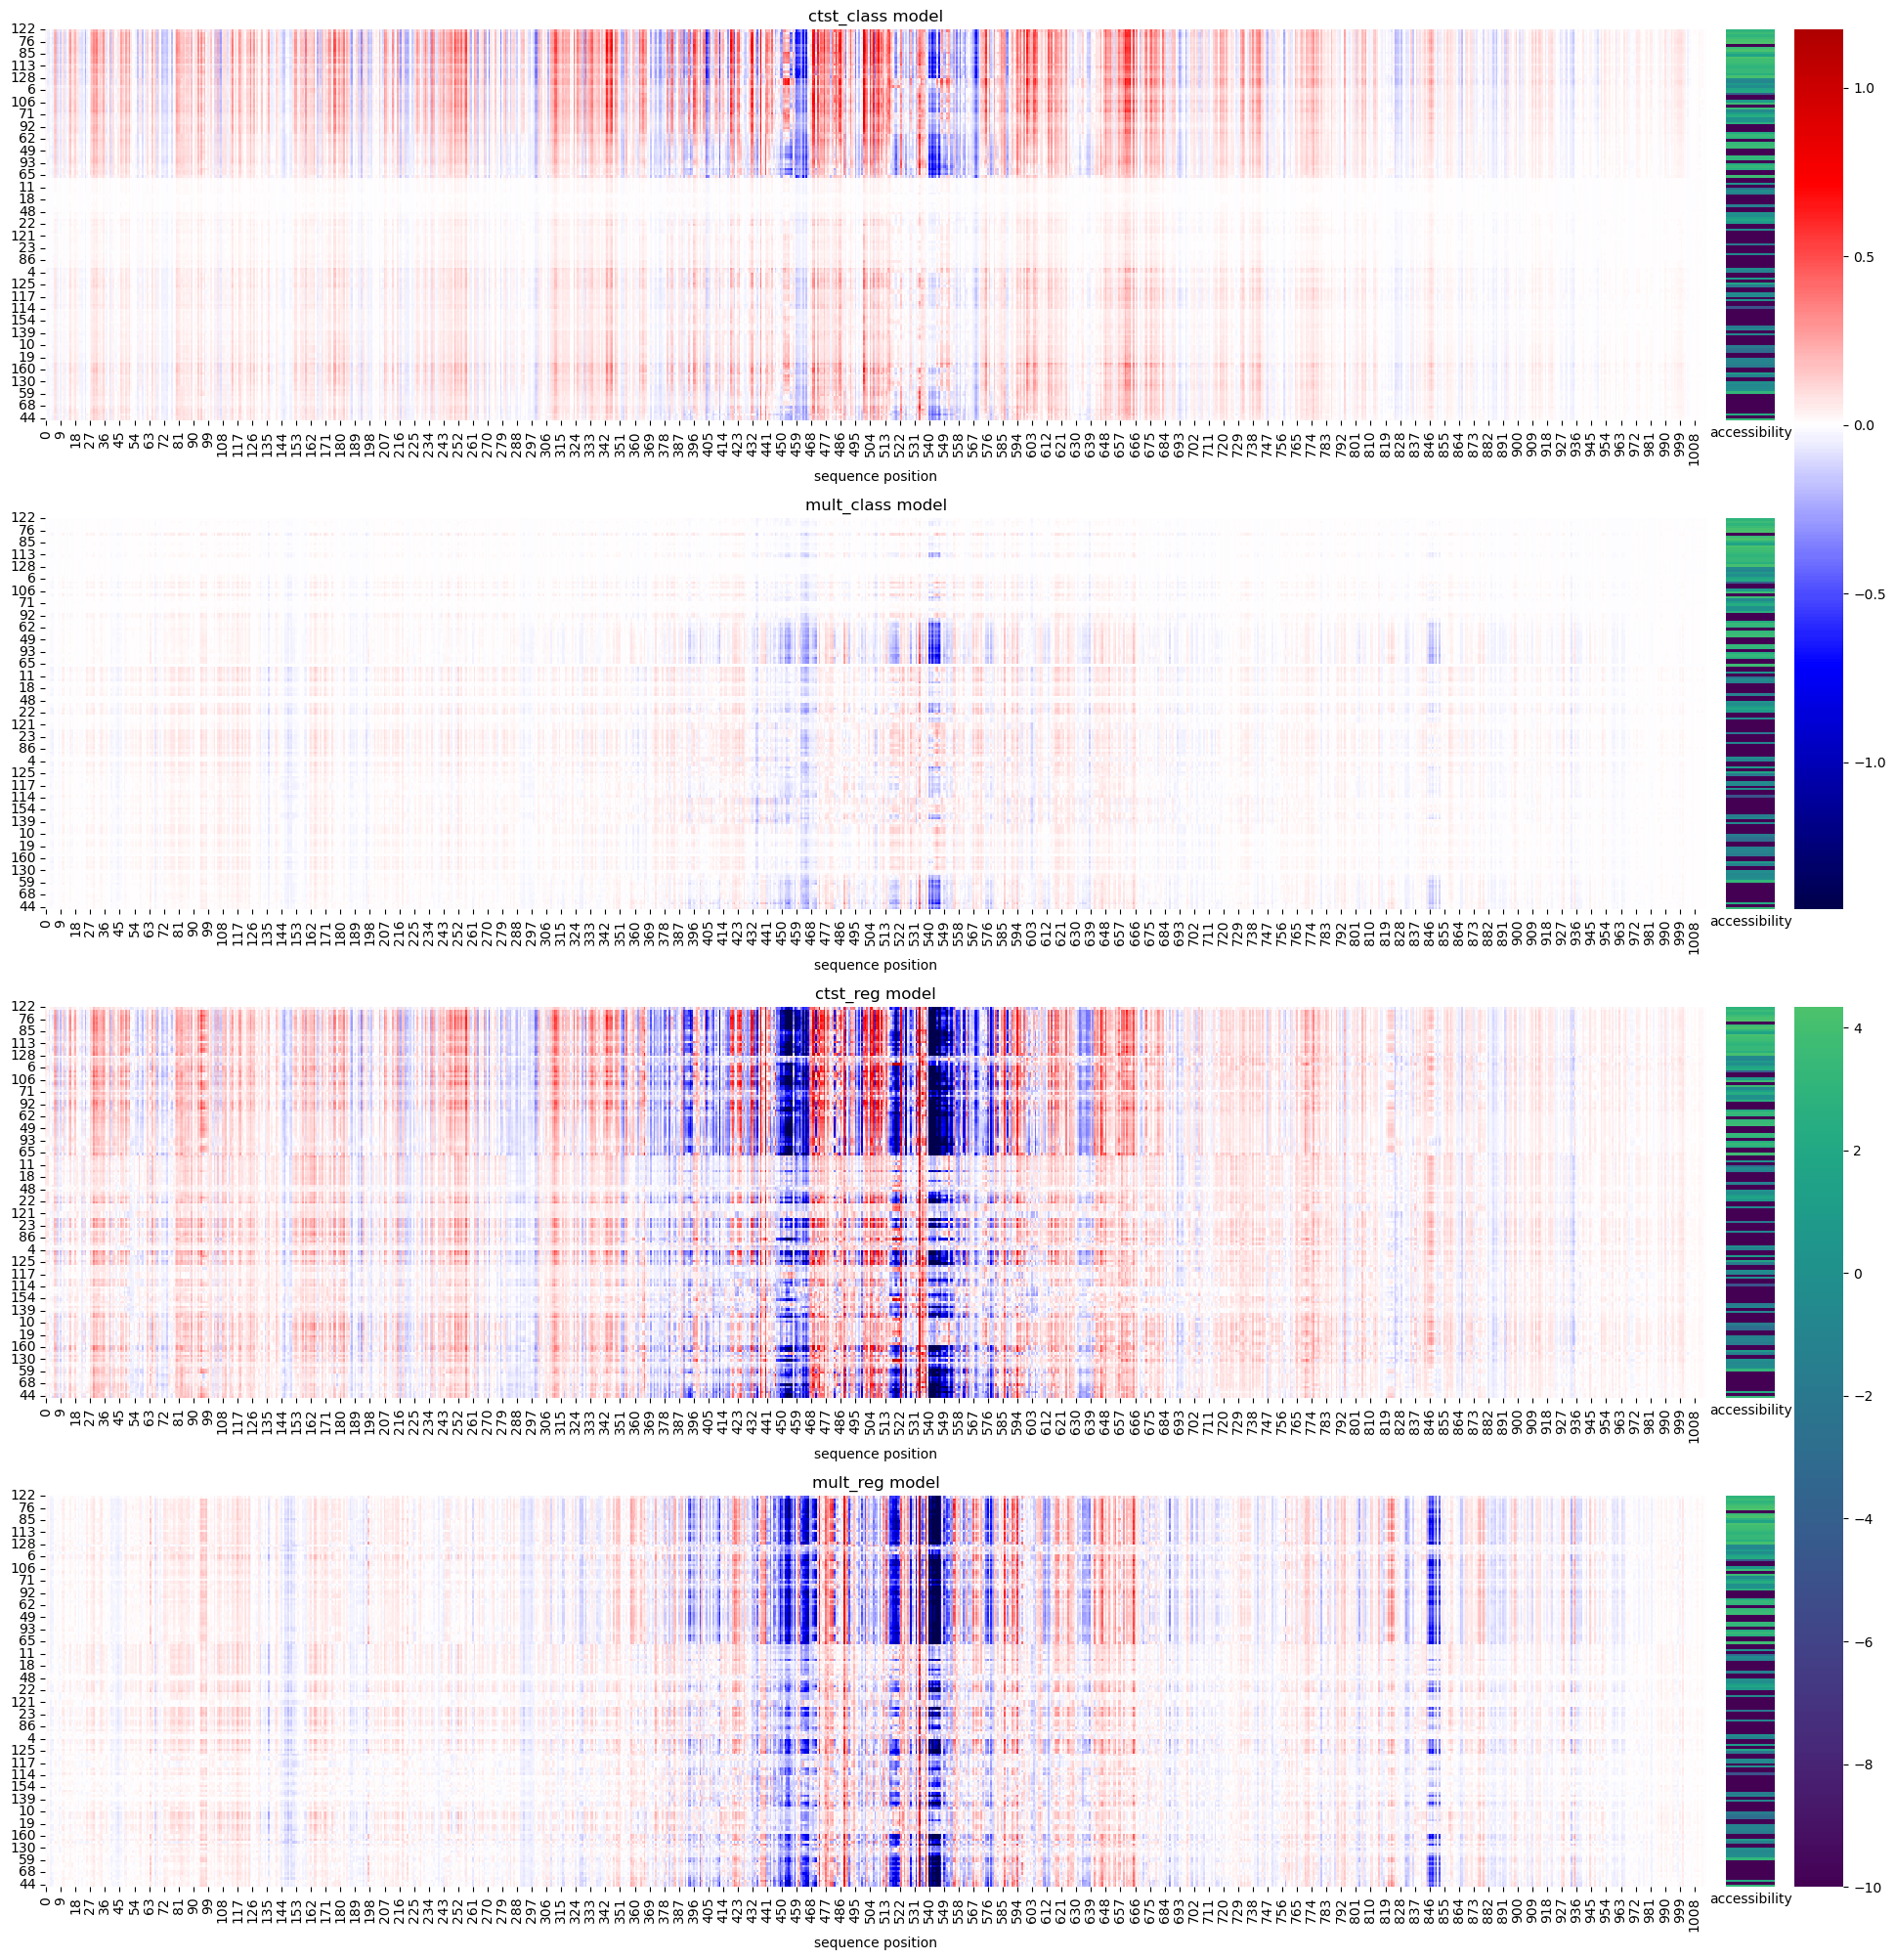

In [39]:
results_list = [ctst_class, mult_class, ctst_reg, mult_reg]
utils_list = [ctst, mult, ctst, mult]
name_list = ['ctst_class', 'mult_class', 'ctst_reg', 'mult_reg']
multi_cluster(results_list, true_values, name_list, utils_list)

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>,
         <Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>],
        [<Axes: title={'center': 'HeLa-S3, true=-10.0'}>,
         <Axes: title={'center': 'HeLa-S3, true=-10.0'}>],
        [<Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>,
         <Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>],
        [<Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>,
         <Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

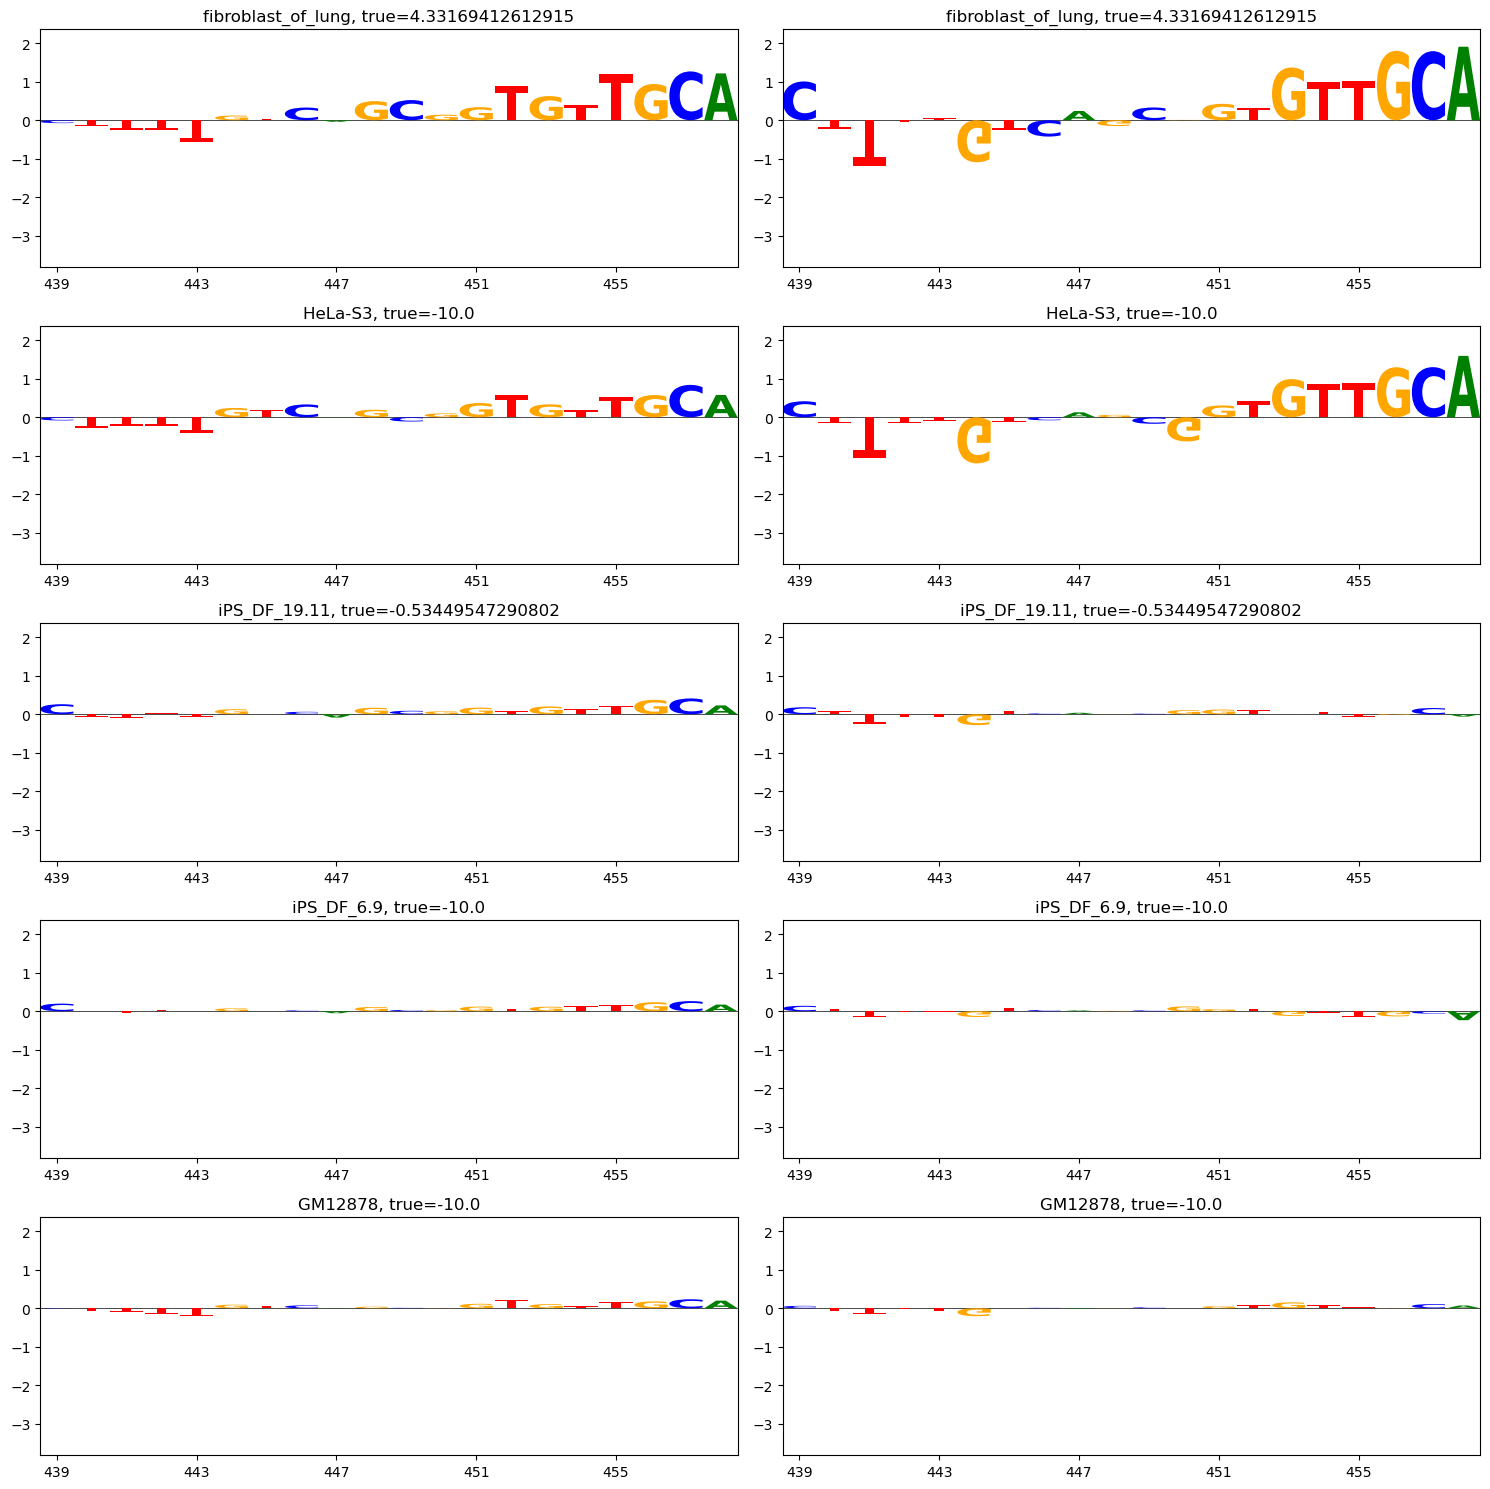

In [47]:
#439 to 459 is a motif
cell_idxs = [76, 160, 128, 117, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(439,459), true_values = true_values)

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>,
         <Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>],
        [<Axes: title={'center': 'HeLa-S3, true=-10.0'}>,
         <Axes: title={'center': 'HeLa-S3, true=-10.0'}>],
        [<Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>,
         <Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>],
        [<Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>,
         <Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

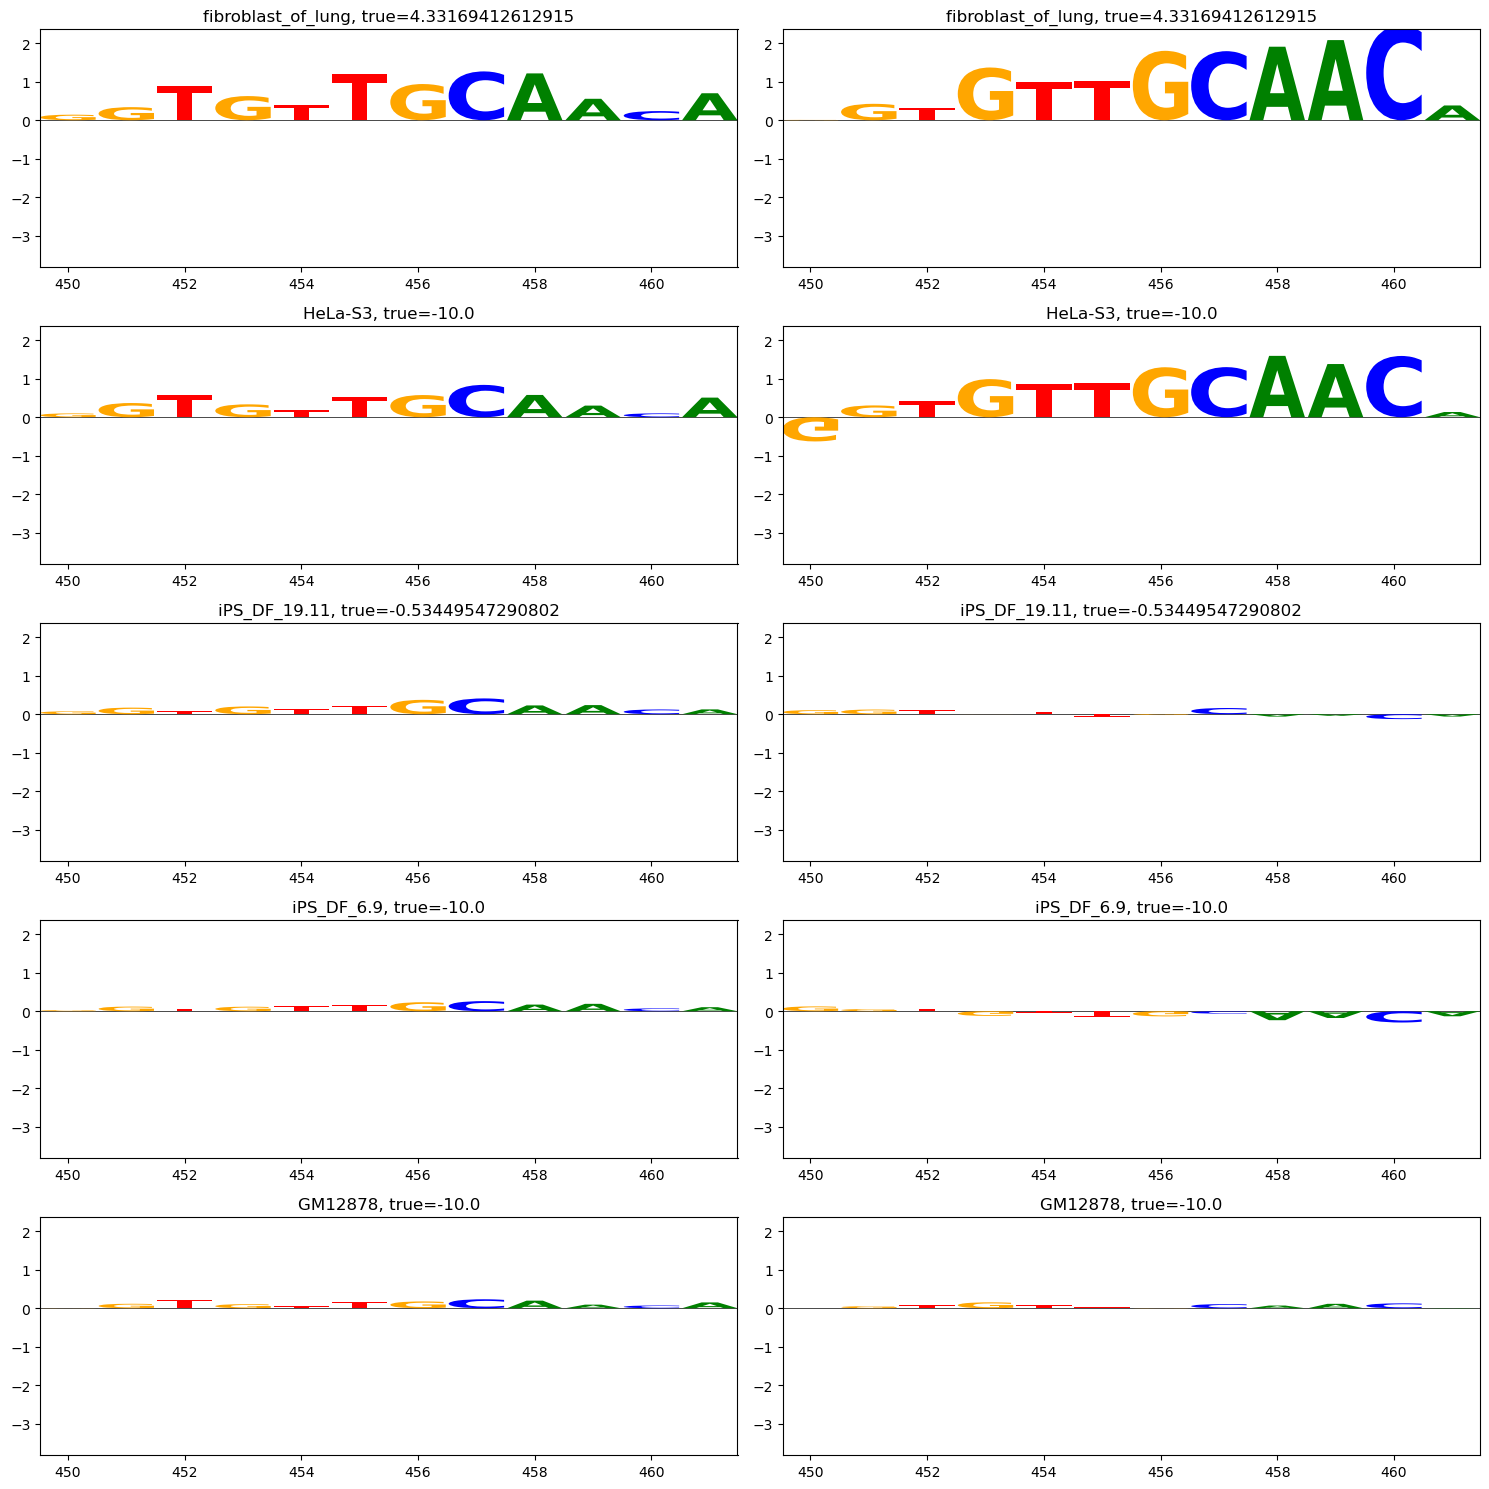

In [48]:
#439 to 459 is a motif
cell_idxs = [76, 160, 128, 117, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(450,462), true_values = true_values)


In [51]:
#that one is hard to tell, also need to easily be able to extract this dataframe, let's find the row that has start values with 439 and 450
print(filtered_df.filter(filtered_df['start'] == 439))

print(filtered_df.filter(filtered_df['start'] == 450))

shape: (1, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---           ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ nce           │
│ str           ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---           │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str           │
╞═══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪═══════════════╡
│ REST_MA0138.2 ┆ train616657   ┆ 439   ┆ 459  ┆ … ┆ 4.15306 ┆ 0.0000956 ┆ 0.84    ┆ TGCAACACCGCTG │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ ACAAAAGC      │
└───────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴─────────┴───────────────┘
shape: (1, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬─

shape: (1, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---           ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ nce           │
│ str           ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---           │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str           │
╞═══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪═══════════════╡
│ FOSL1_MA0477. ┆ train616657   ┆ 542   ┆ 552  ┆ … ┆ 10.0182 ┆ 0.0000831 ┆ 0.6     ┆ TGTGACTAAGG   │
│ 1             ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆               │
└───────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴─────────┴───────────────┘


(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>,
         <Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>],
        [<Axes: title={'center': 'HeLa-S3, true=-10.0'}>,
         <Axes: title={'center': 'HeLa-S3, true=-10.0'}>],
        [<Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>,
         <Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>],
        [<Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>,
         <Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

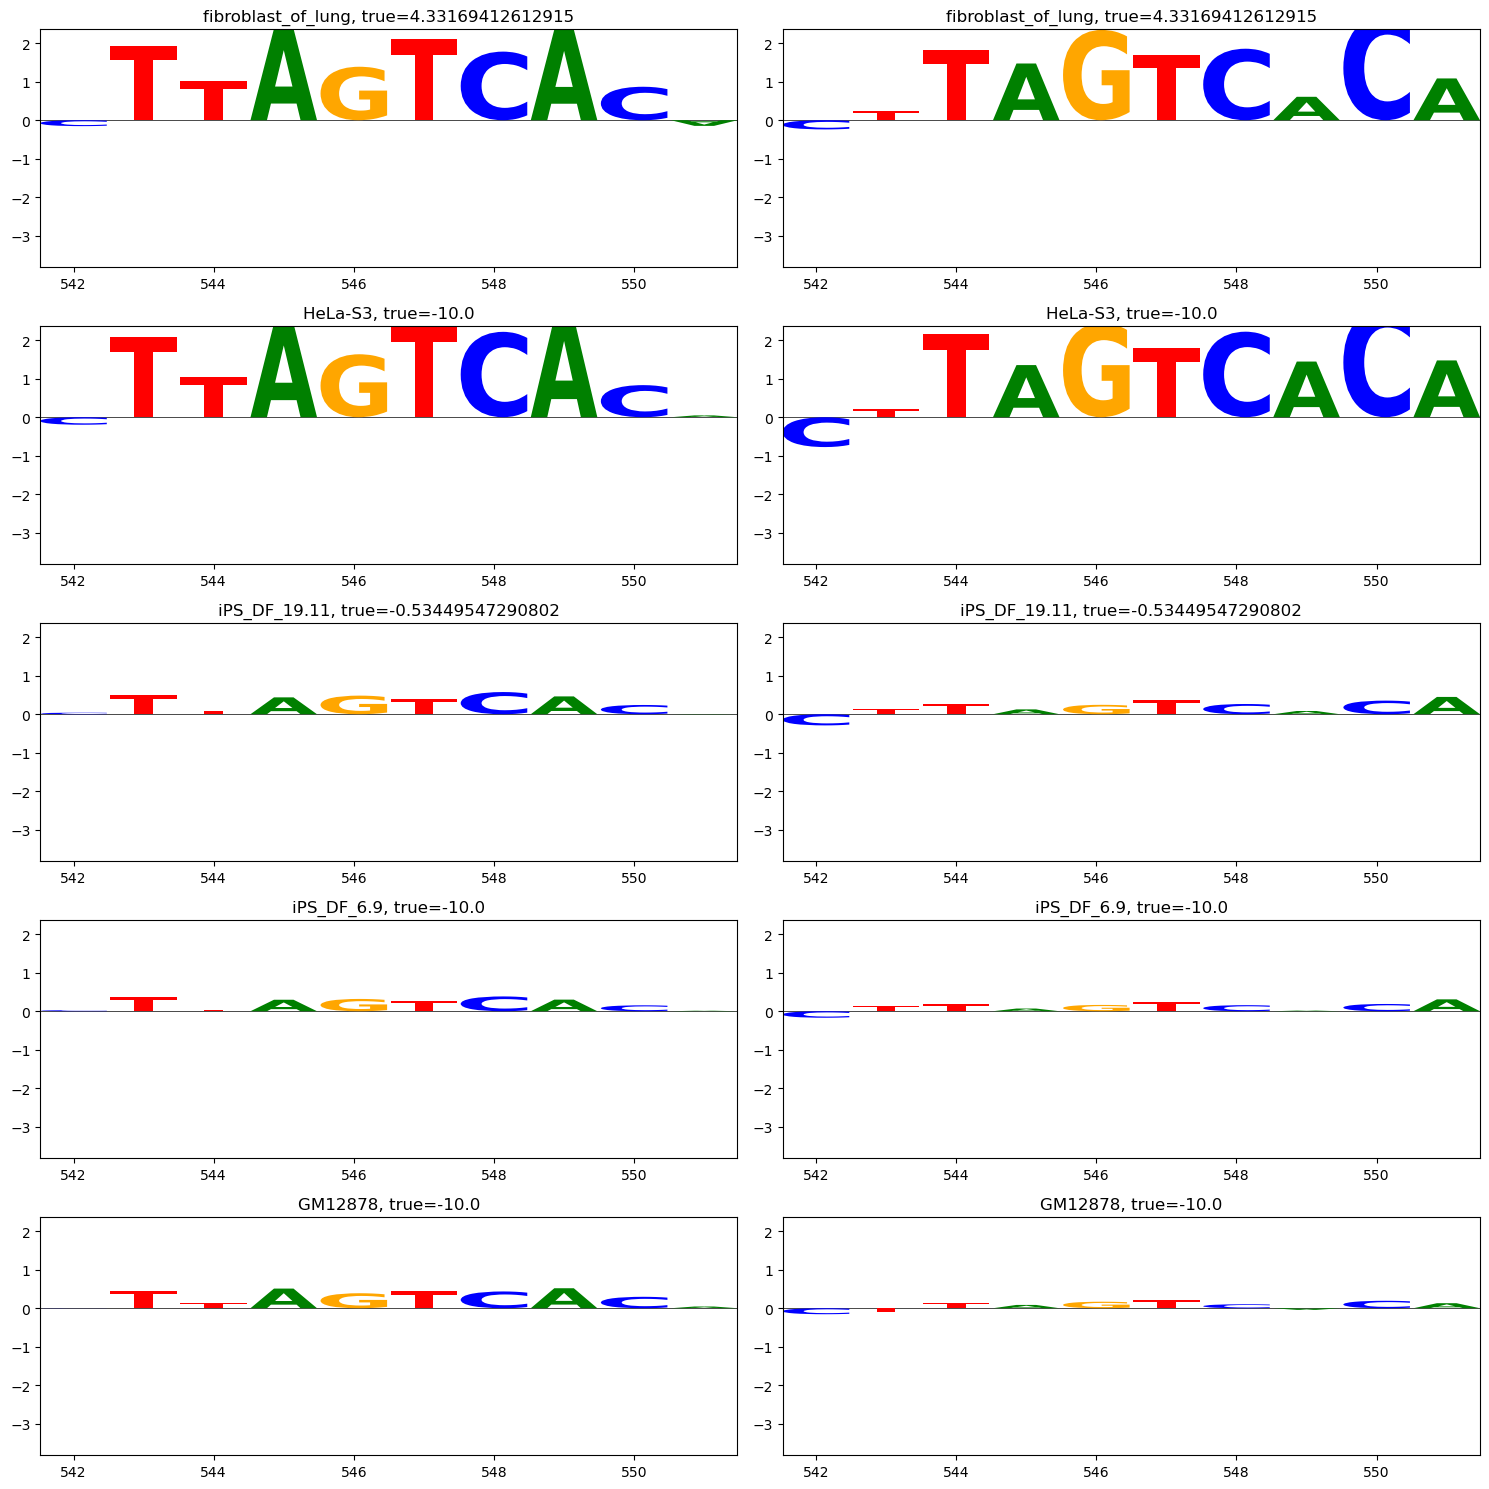

In [55]:
#also 531 to 546 is shit
print(filtered_df.filter(filtered_df['start'] == 542))
cell_idxs = [76, 160, 128, 117, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(542,552), true_values = true_values)

shape: (3, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---           ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ nce           │
│ str           ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---           │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str           │
╞═══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪═══════════════╡
│ ETS1_MA0098.3 ┆ train616657   ┆ 550   ┆ 559  ┆ … ┆ 11.8182 ┆ 0.0000541 ┆ 1.0     ┆ ACAGGATGTG    │
│ ERF_MA0760.1  ┆ train616657   ┆ 550   ┆ 559  ┆ … ┆ 11.2    ┆ 0.0000628 ┆ 1.0     ┆ ACAGGATGTG    │
│ ERG_MA0474.2  ┆ train616657   ┆ 550   ┆ 559  ┆ … ┆ 11.0577 ┆ 0.0000861 ┆ 1.0     ┆ ACAGGATGTG    │
└───────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴───

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>,
         <Axes: title={'center': 'fibroblast_of_lung, true=4.33169412612915'}>],
        [<Axes: title={'center': 'HeLa-S3, true=-10.0'}>,
         <Axes: title={'center': 'HeLa-S3, true=-10.0'}>],
        [<Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>,
         <Axes: title={'center': 'iPS_DF_19.11, true=-0.53449547290802'}>],
        [<Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>,
         <Axes: title={'center': 'iPS_DF_6.9, true=-10.0'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

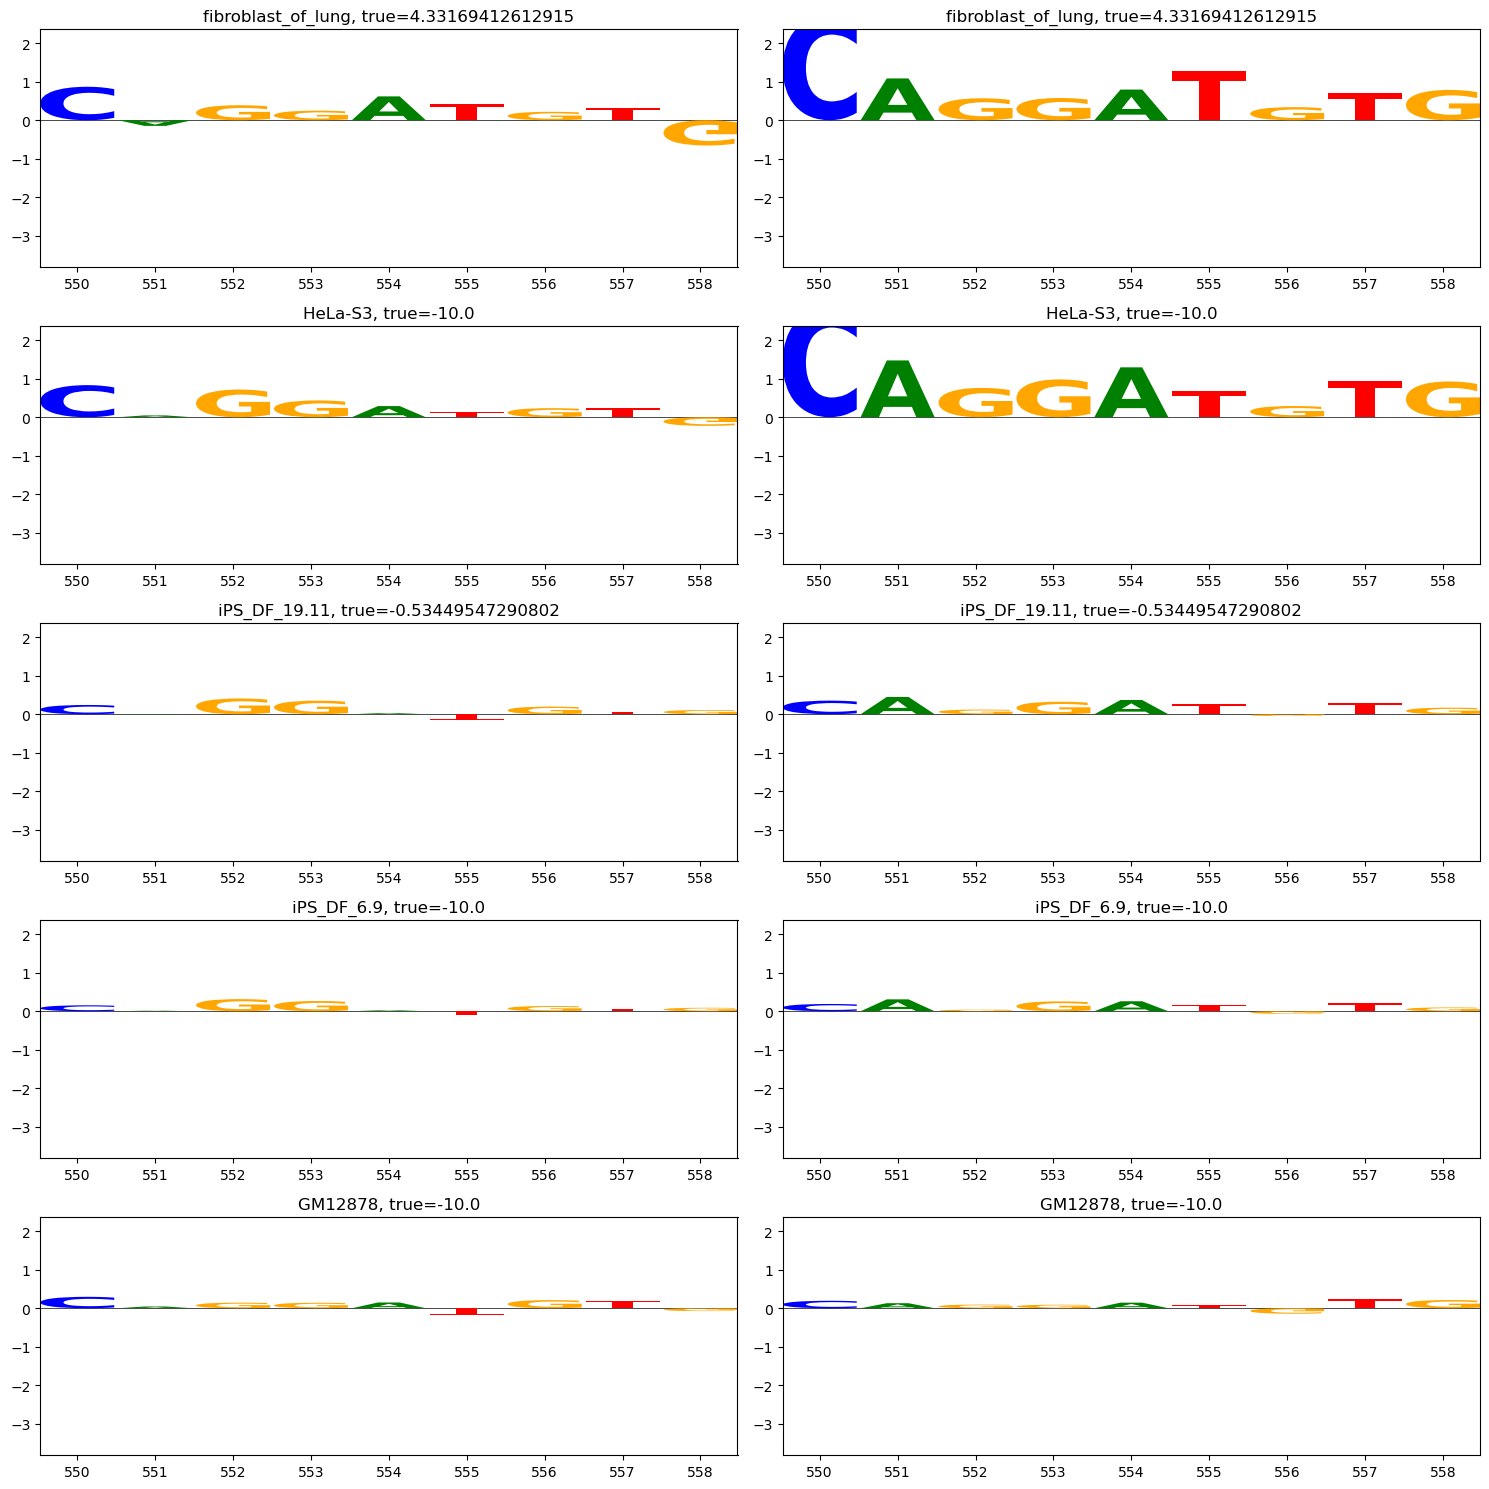

In [56]:
#also 531 to 546 is shit
print(filtered_df.filter(filtered_df['start'] == 550))
cell_idxs = [76, 160, 128, 117, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(550,559), true_values = true_values)

In [ ]:
#overall idk, nothing that seems particularly interesting or useful at all lmao!

# next ccre!

In [57]:
#let's choose a middle cCRE from the idxs
idx = idxs[len(idxs)//2]
print(idx)

48986


In [61]:
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
print(true_values,true_values.shape) #lots of -10 for sure!

ctst_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_reg.npy')
mult_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_reg.npy')
ctst_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_class.npy')
mult_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_class.npy')

print(ctst_class.shape, ctst_reg.shape, mult_class.shape, mult_reg.shape)
#now let's look at the motifs for this cCRE
#sort the df for only rows that have this ccre training idx
filtered_df = fimo_results.filter(fimo_results['sequence_name'] == f'train{idx}')
#now let's turn this start and stop columns into a nx2 vector
selected = filtered_df.select('start', 'stop', 'q-value').to_numpy()


tensor([-5.8204e-01, -1.2013e+00, -7.0969e-01, -1.2569e+00, -2.2548e+00,
        -1.6128e+00, -2.6277e-01, -2.4758e+00, -4.3435e-01, -3.2155e+00,
        -1.1114e+00, -1.0000e+01, -1.0000e+01, -1.0000e+01, -1.3793e+00,
        -1.0000e+01, -1.0000e+01, -1.0000e+01, -5.6257e-01, -1.0000e+01,
        -8.1275e-01, -6.1848e-01, -8.4003e-01, -1.0000e+01, -1.7529e-01,
        -1.0000e+01, -1.4521e+00, -8.5654e-01, -1.0000e+01, -1.0000e+01,
        -8.0451e-01, -1.0000e+01, -1.1536e+00, -6.3344e-01, -1.3757e+00,
        -1.7691e+00, -1.8222e+00, -1.1011e-01, -1.5995e-01, -1.0000e+01,
        -1.0000e+01,  1.8390e-01, -1.1864e-01, -4.6968e-01, -1.0000e+01,
        -4.5515e-01,  4.6899e-02, -4.2170e-01,  1.2428e+00, -1.7260e-01,
        -9.9572e-02,  4.2359e-01,  3.3098e-01,  7.9437e-02, -1.2595e-01,
         1.6666e-01,  8.4888e-01, -2.2652e-01, -1.3691e-01, -3.9144e-01,
        -7.8394e-01, -3.2916e-01, -1.0000e+01, -8.3491e-01, -1.6195e-01,
         5.9869e-02,  5.8114e-02, -1.0796e-01, -4.0

In [63]:
selected = filtered_df.select('start', 'stop', 'p-value').to_numpy()

print(selected[selected[:,0].argsort()])

[[2.300e+01 3.400e+01 1.170e-05]
 [2.400e+01 3.500e+01 3.950e-06]
 [2.500e+01 3.600e+01 1.400e-06]
 [2.600e+01 3.700e+01 1.400e-06]
 [2.700e+01 3.800e+01 2.500e-06]
 [2.800e+01 3.900e+01 2.500e-06]
 [2.800e+01 4.800e+01 4.160e-05]
 [2.900e+01 4.000e+01 2.500e-06]
 [3.000e+01 4.100e+01 2.500e-06]
 [3.100e+01 4.200e+01 2.500e-06]
 [3.200e+01 4.300e+01 4.340e-05]
 [3.300e+01 4.400e+01 5.280e-05]
 [5.300e+01 6.400e+01 7.770e-06]
 [5.400e+01 6.500e+01 1.070e-05]
 [5.500e+01 6.600e+01 1.850e-06]
 [5.600e+01 6.700e+01 7.270e-06]
 [5.700e+01 6.800e+01 2.500e-06]
 [5.800e+01 6.900e+01 3.120e-05]
 [6.400e+01 7.500e+01 3.280e-05]
 [7.000e+01 7.900e+01 5.700e-06]
 [1.030e+02 1.170e+02 1.020e-05]
 [1.090e+02 1.230e+02 5.290e-05]
 [1.420e+02 1.510e+02 1.630e-05]
 [1.420e+02 1.510e+02 1.600e-05]
 [2.080e+02 2.200e+02 3.250e-05]
 [2.080e+02 2.180e+02 2.140e-05]
 [2.090e+02 2.190e+02 3.140e-05]
 [2.090e+02 2.190e+02 4.250e-05]
 [2.480e+02 2.570e+02 1.310e-05]
 [2.480e+02 2.610e+02 7.980e-05]
 [2.480e+0

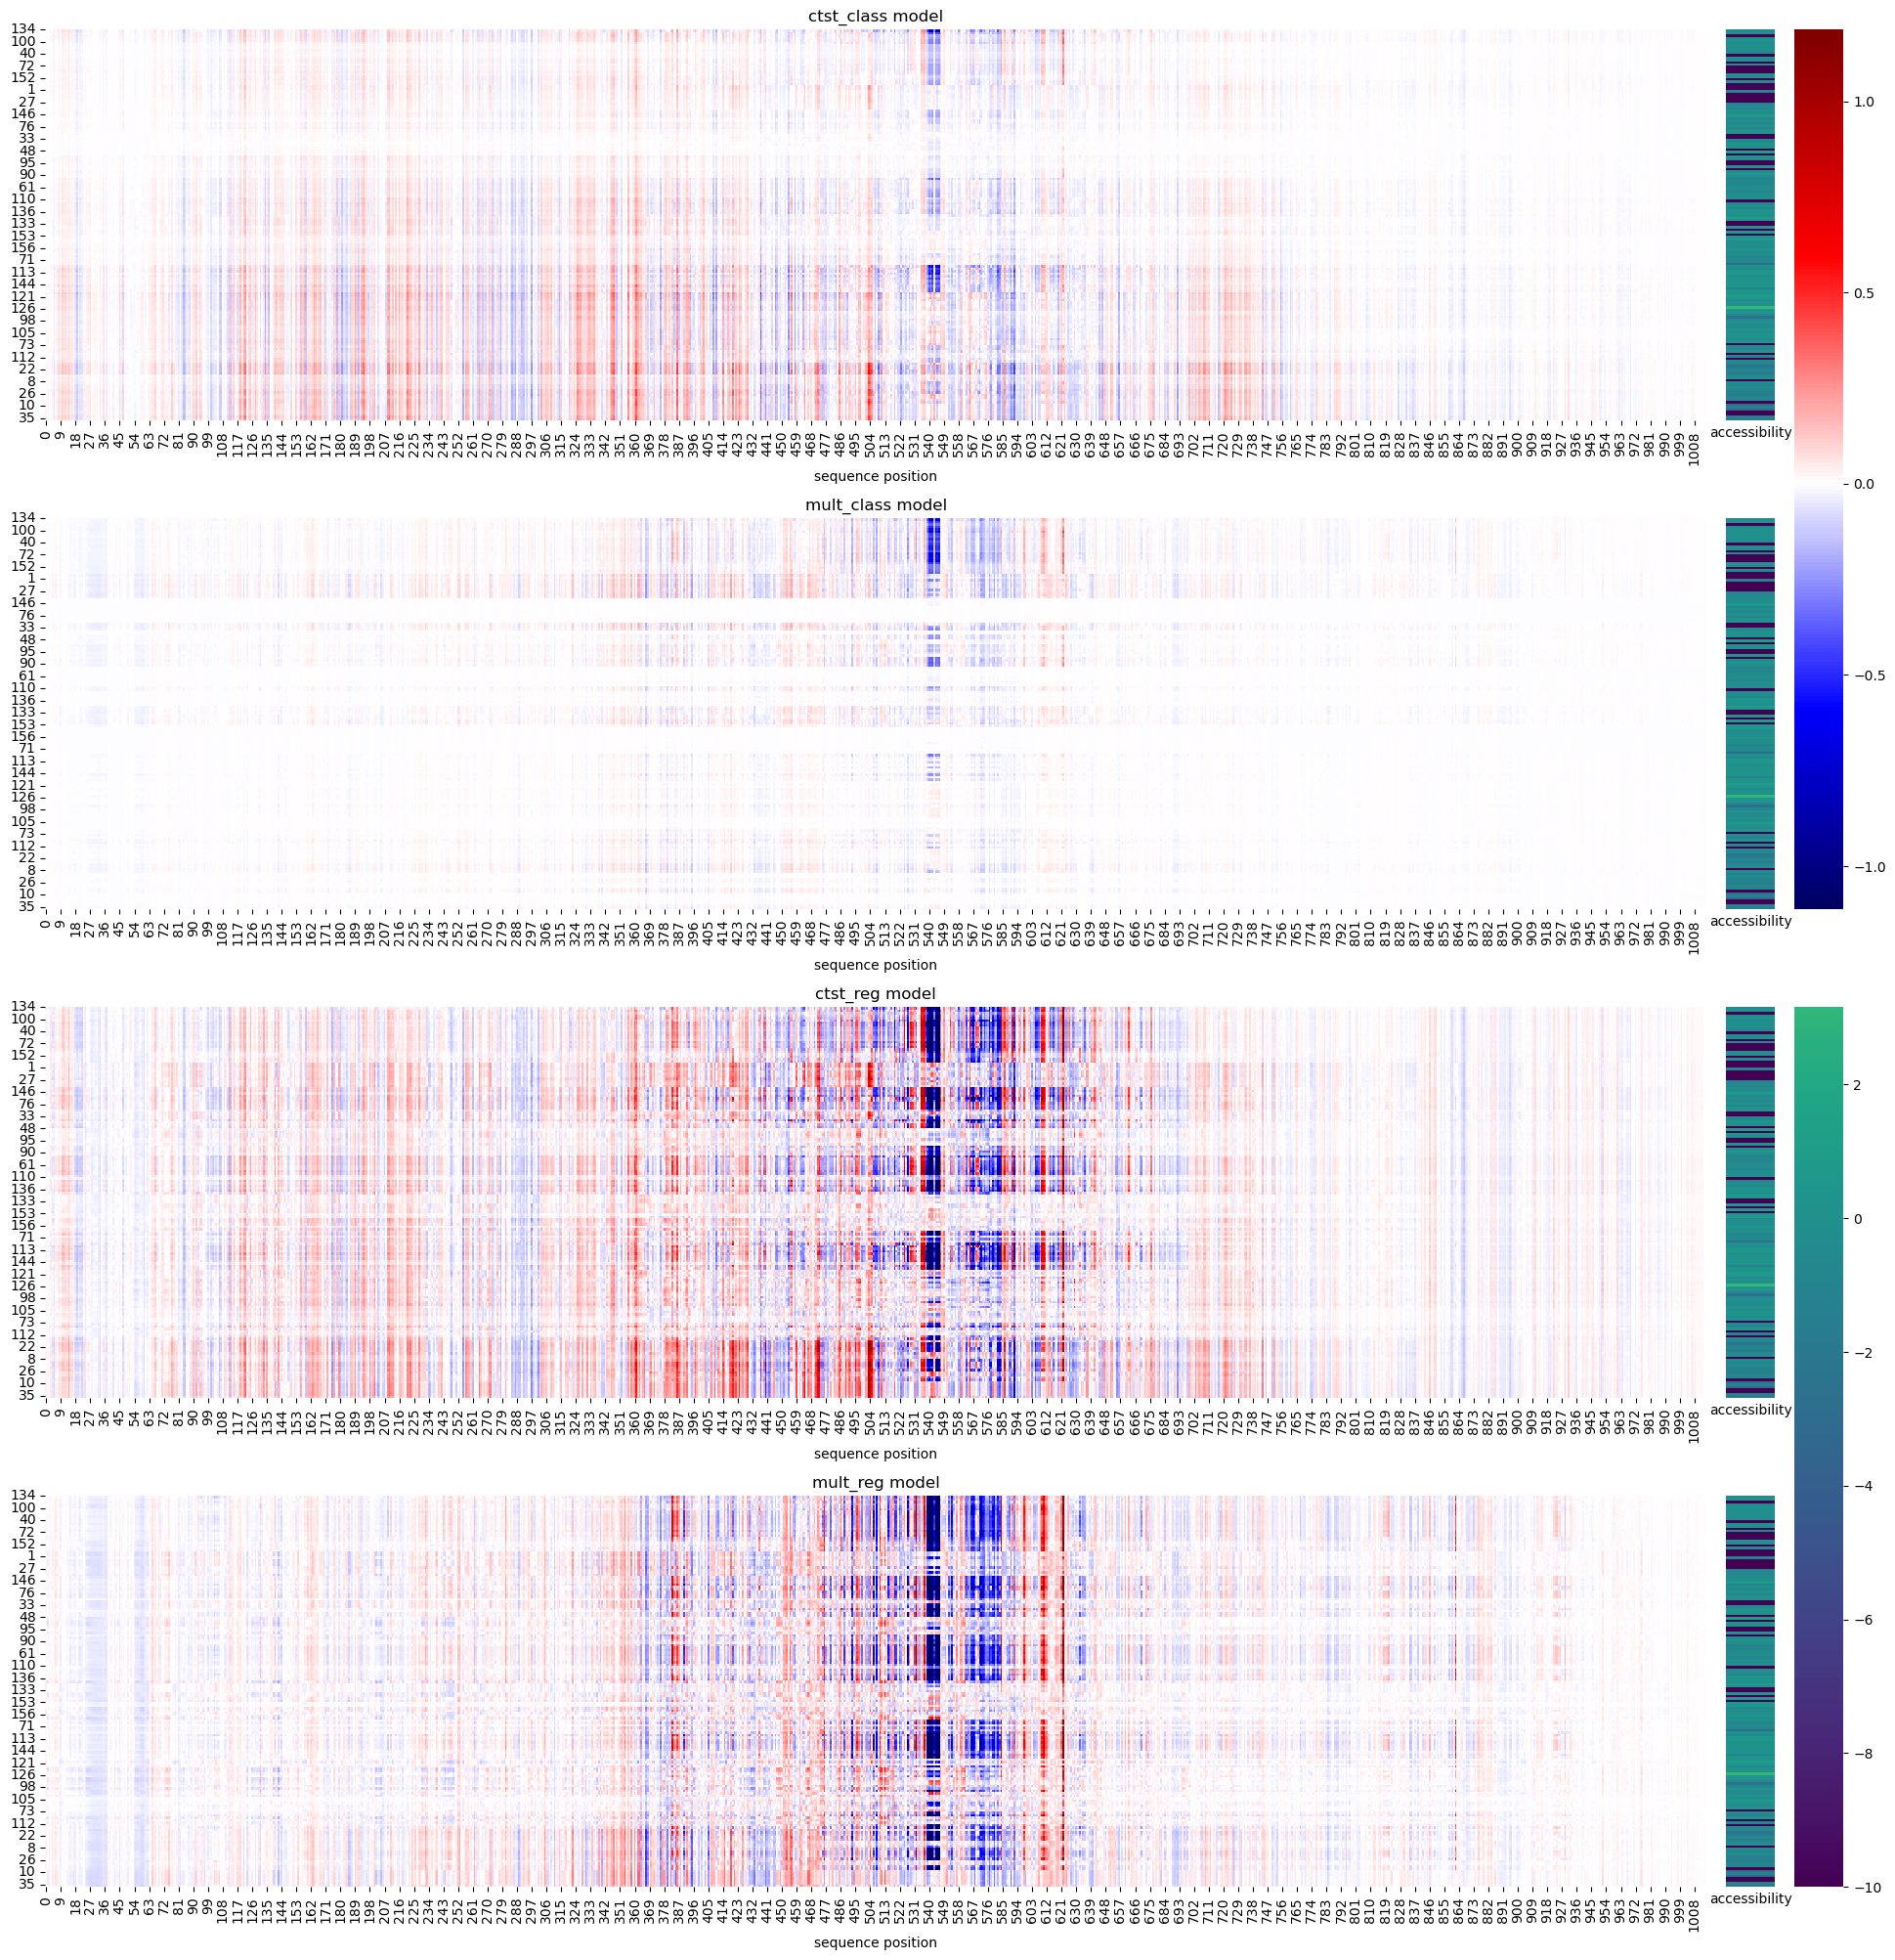

In [60]:
#and now let's look at the plot
results_list = [ctst_class, mult_class, ctst_reg, mult_reg]
utils_list = [ctst, mult, ctst, mult]
name_list = ['ctst_class', 'mult_class', 'ctst_reg', 'mult_reg']
multi_cluster(results_list, true_values, name_list, utils_list)

shape: (1, 9)
┌────────────────┬───────────────┬───────┬──────┬───┬────────┬───────────┬─────────┬───────────────┐
│ motif_id       ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score  ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---            ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---    ┆ ---       ┆ ---     ┆ nce           │
│ str            ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64    ┆ f64       ┆ f64     ┆ ---           │
│                ┆               ┆       ┆      ┆   ┆        ┆           ┆         ┆ str           │
╞════════════════╪═══════════════╪═══════╪══════╪═══╪════════╪═══════════╪═════════╪═══════════════╡
│ Gfi1b_MA0483.1 ┆ train48986    ┆ 530   ┆ 540  ┆ … ┆ 12.931 ┆ 0.0000253 ┆ 0.294   ┆ CAACCTCTGCA   │
└────────────────┴───────────────┴───────┴──────┴───┴────────┴───────────┴─────────┴───────────────┘


(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'non-pigmented_ciliary_epithelial_cell, true=-10.0'}>,
         <Axes: title={'center': 'non-pigmented_ciliary_epithelial_cell, true=-10.0'}>],
        [<Axes: title={'center': 'chorion_tissue, true=-1.2012608051300049'}>,
         <Axes: title={'center': 'chorion_tissue, true=-1.2012608051300049'}>],
        [<Axes: title={'center': 'neural_crest_cell, true=0.447841078042984'}>,
         <Axes: title={'center': 'neural_crest_cell, true=0.447841078042984'}>],
        [<Axes: title={'center': 'HPDE6-E6E7, true=-0.8400266170501709'}>,
         <Axes: title={'center': 'HPDE6-E6E7, true=-0.8400266170501709'}>],
        [<Axes: title={'center': 'GM12878, true=-0.12595322728157043'}>,
         <Axes: title={'center': 'GM12878, true=-0.12595322728157043'}>]],
       dtype=object))

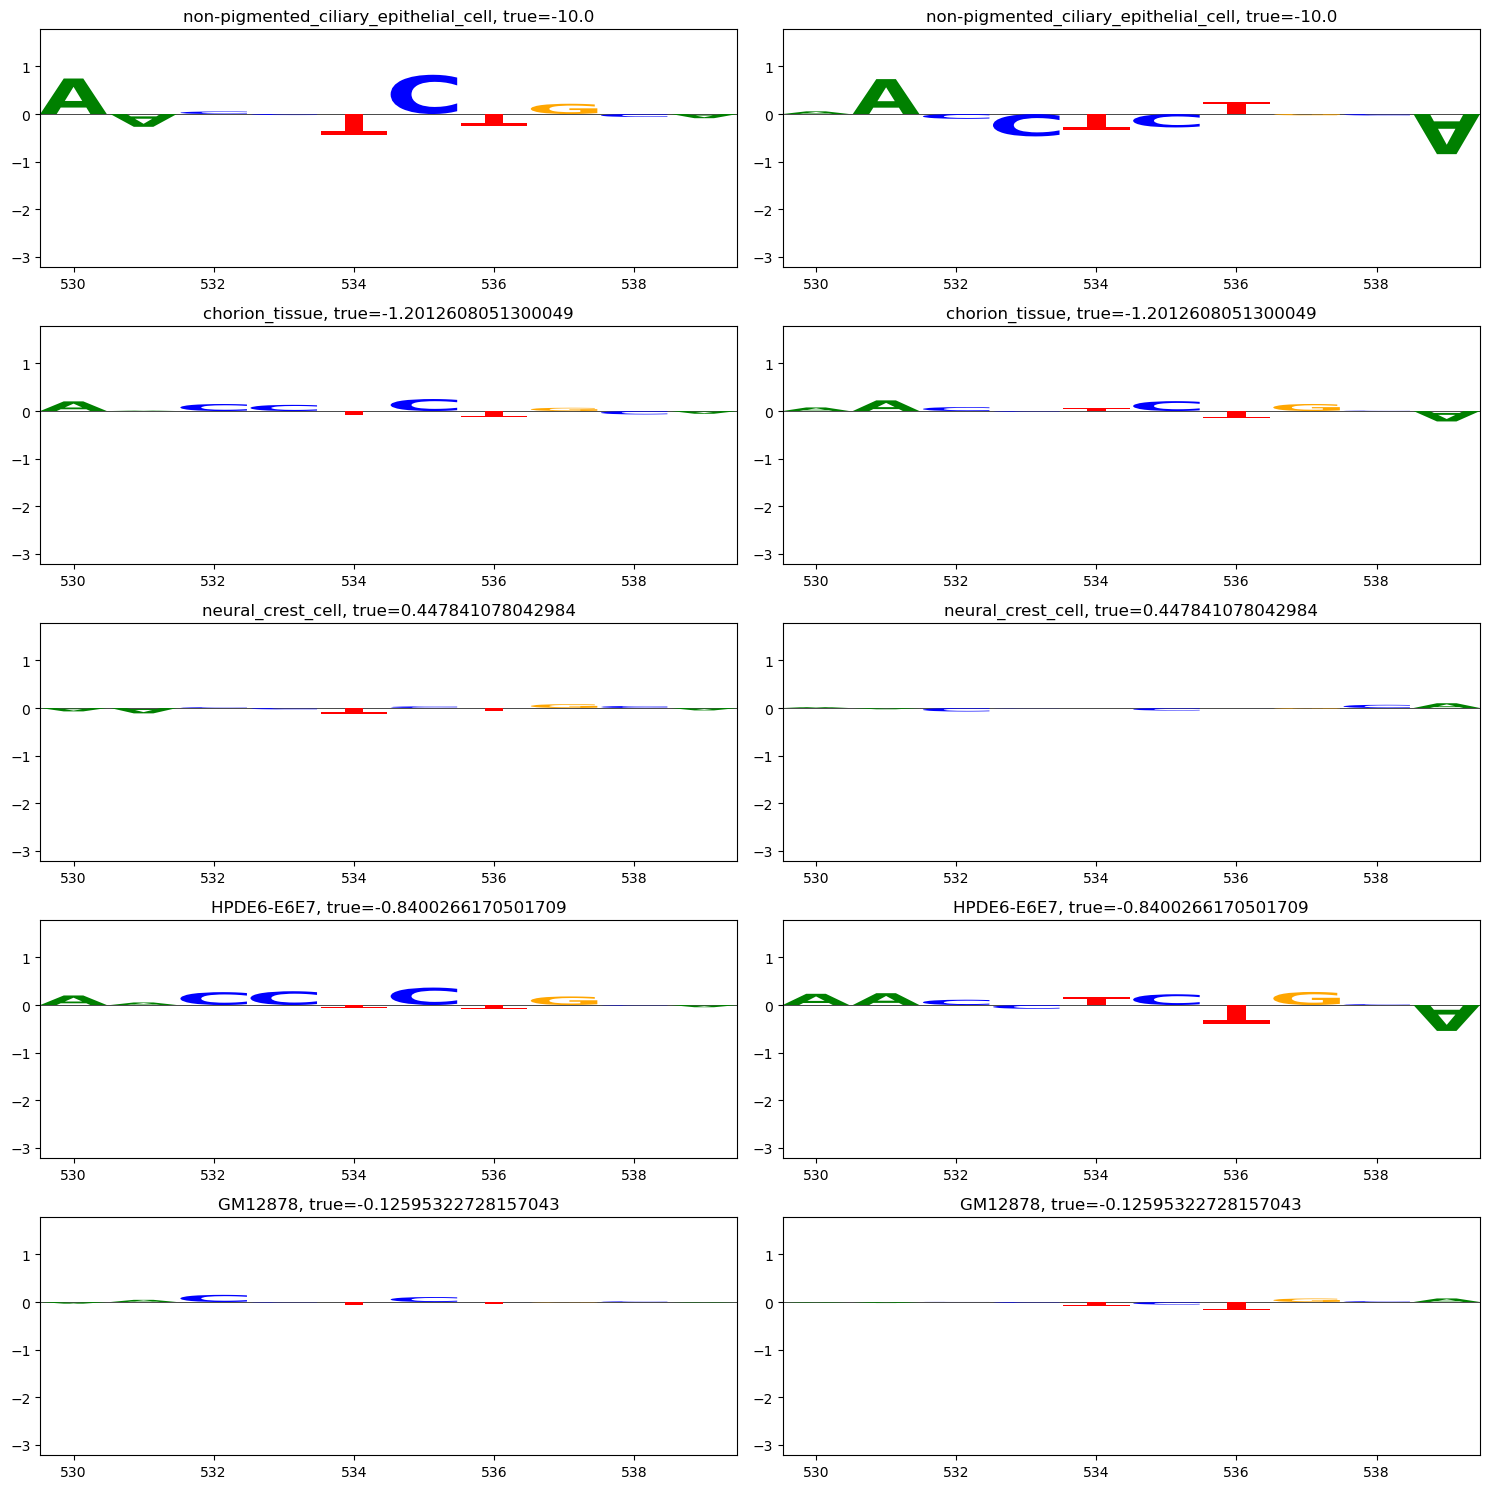

In [64]:
#let's look at 530 to 540 and then 540 to 550
print(filtered_df.filter(filtered_df['start'] == 530))
#and now the logo plot
cell_idxs = [72, 1, 153, 22, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(530,540), true_values = true_values)

shape: (1, 9)
┌──────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬────────────────┐
│ motif_id     ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_sequen │
│ ---          ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ ce             │
│ str          ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---            │
│              ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str            │
╞══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪════════════════╡
│ JUN_MA0489.1 ┆ train48986    ┆ 538   ┆ 551  ┆ … ┆ 14.2308 ┆ 0.0000113 ┆ 0.422   ┆ GCAAAGTGACTCAG │
└──────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴─────────┴────────────────┘
shape: (18, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'non-pigmented_ciliary_epithelial_cell, true=-10.0'}>,
         <Axes: title={'center': 'non-pigmented_ciliary_epithelial_cell, true=-10.0'}>],
        [<Axes: title={'center': 'chorion_tissue, true=-1.2012608051300049'}>,
         <Axes: title={'center': 'chorion_tissue, true=-1.2012608051300049'}>],
        [<Axes: title={'center': 'neural_crest_cell, true=0.447841078042984'}>,
         <Axes: title={'center': 'neural_crest_cell, true=0.447841078042984'}>],
        [<Axes: title={'center': 'HPDE6-E6E7, true=-0.8400266170501709'}>,
         <Axes: title={'center': 'HPDE6-E6E7, true=-0.8400266170501709'}>],
        [<Axes: title={'center': 'GM12878, true=-0.12595322728157043'}>,
         <Axes: title={'center': 'GM12878, true=-0.12595322728157043'}>]],
       dtype=object))

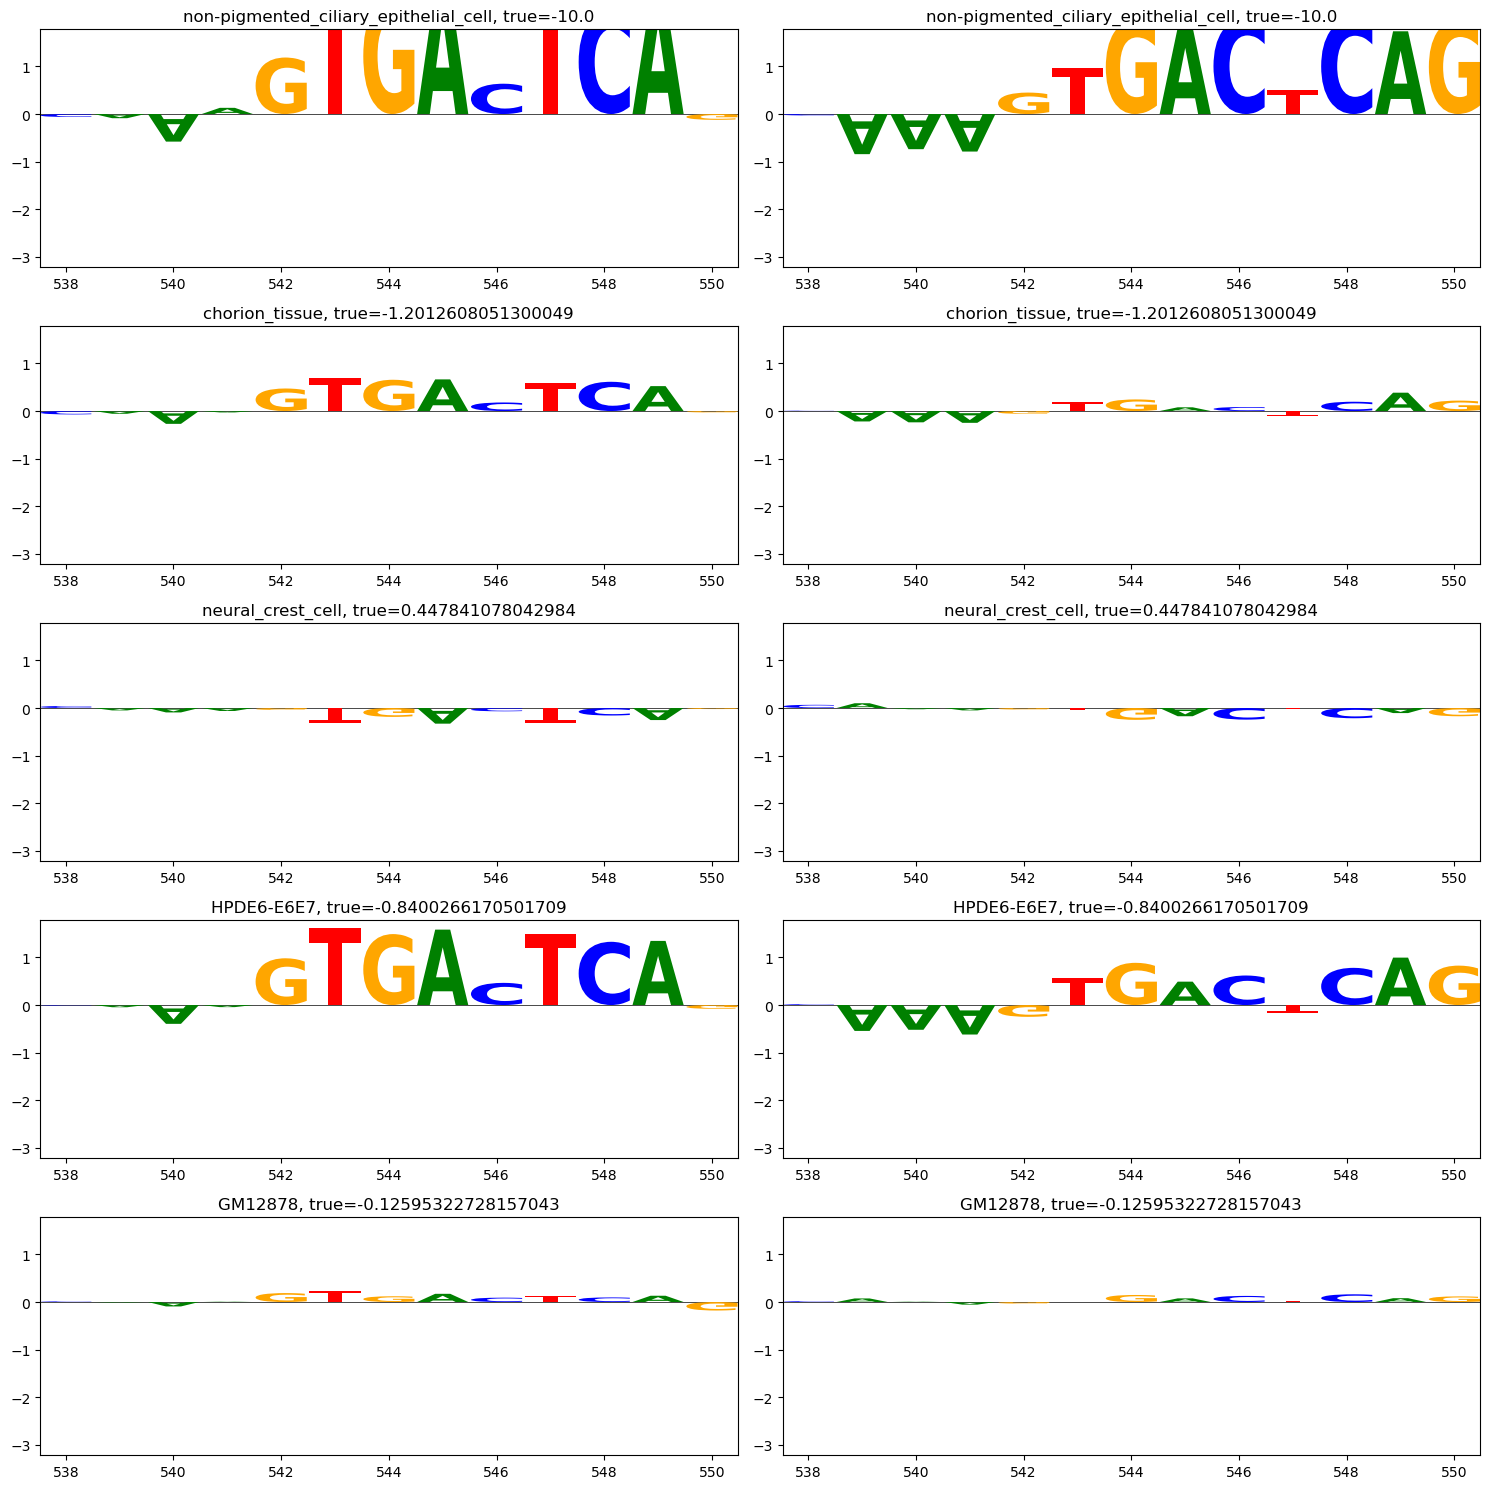

In [72]:
print(filtered_df.filter(filtered_df['start'] == 538))
print(filtered_df.filter(filtered_df['start'].is_in(list(range(540,545)))))
#and now the logo plot
cell_idxs = [72, 1, 153, 22, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(538,551), true_values = true_values)

# next ccre!

In [75]:
#let's choose a middle cCRE from the idxs
idx = idxs[len(idxs)//2+132]
print(idx)
true_values = mult.dataset[idx][1][1] #the first 1 is results, then the second 1 is regression
print(true_values,true_values.shape) #lots of -10 for sure!

ctst_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_reg.npy')
mult_reg = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_reg.npy')
ctst_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/ctst_bestepoch_{idx}_class.npy')
mult_class = np.load(f'/data/leslie/sarthak/hyena/hyena-dna/shap_analysis/most_variable_cCREs2/train/multitasking_25epoch_{idx}_class.npy')

print(ctst_class.shape, ctst_reg.shape, mult_class.shape, mult_reg.shape)
#now let's look at the motifs for this cCRE
#sort the df for only rows that have this ccre training idx
filtered_df = fimo_results.filter(fimo_results['sequence_name'] == f'train{idx}')
#now let's turn this start and stop columns into a nx2 vector
# selected = filtered_df.select('start', 'stop', 'q-value').to_numpy()

selected = filtered_df.select('start', 'stop').to_numpy()

print(selected[selected[:,0].argsort()])

675868
tensor([ -1.2690, -10.0000,  -2.0813,  -1.8313,  -1.8870,  -1.5763,  -1.5183,
         -0.9090,  -1.9579,  -4.4719,  -3.6186,  -1.2414,  -0.5254,  -2.2372,
         -1.1891, -10.0000, -10.0000,  -0.2250, -10.0000,  -2.1863,  -1.8710,
        -10.0000,  -3.3780, -10.0000,  -1.3759, -10.0000,  -2.2032, -10.0000,
        -10.0000, -10.0000,  -1.1060, -10.0000,  -3.1137, -10.0000,  -1.2433,
        -10.0000,  -0.9501,  -1.3155,  -2.7731,  -0.1998,  -0.3888, -10.0000,
         -0.6380,  -0.2666,  -0.1543,  -0.0694, -10.0000, -10.0000,  -0.3880,
        -10.0000, -10.0000, -10.0000, -10.0000,  -1.3194, -10.0000,  -3.1295,
          1.4231,  -1.2029,  -0.9349, -10.0000,  -1.2179,  -3.1199,   0.4598,
        -10.0000,  -0.3628,  -1.5016,  -1.1794,  -2.0453, -10.0000, -10.0000,
         -0.5446,  -1.4084,  -2.4092, -10.0000, -10.0000, -10.0000,  -0.6945,
         -0.4904, -10.0000,   0.1934,  -0.0950,  -1.2647,  -1.5117,  -1.0931,
         -1.1471,  -0.5746,  -1.3520,  -1.3888,  -0.5791,

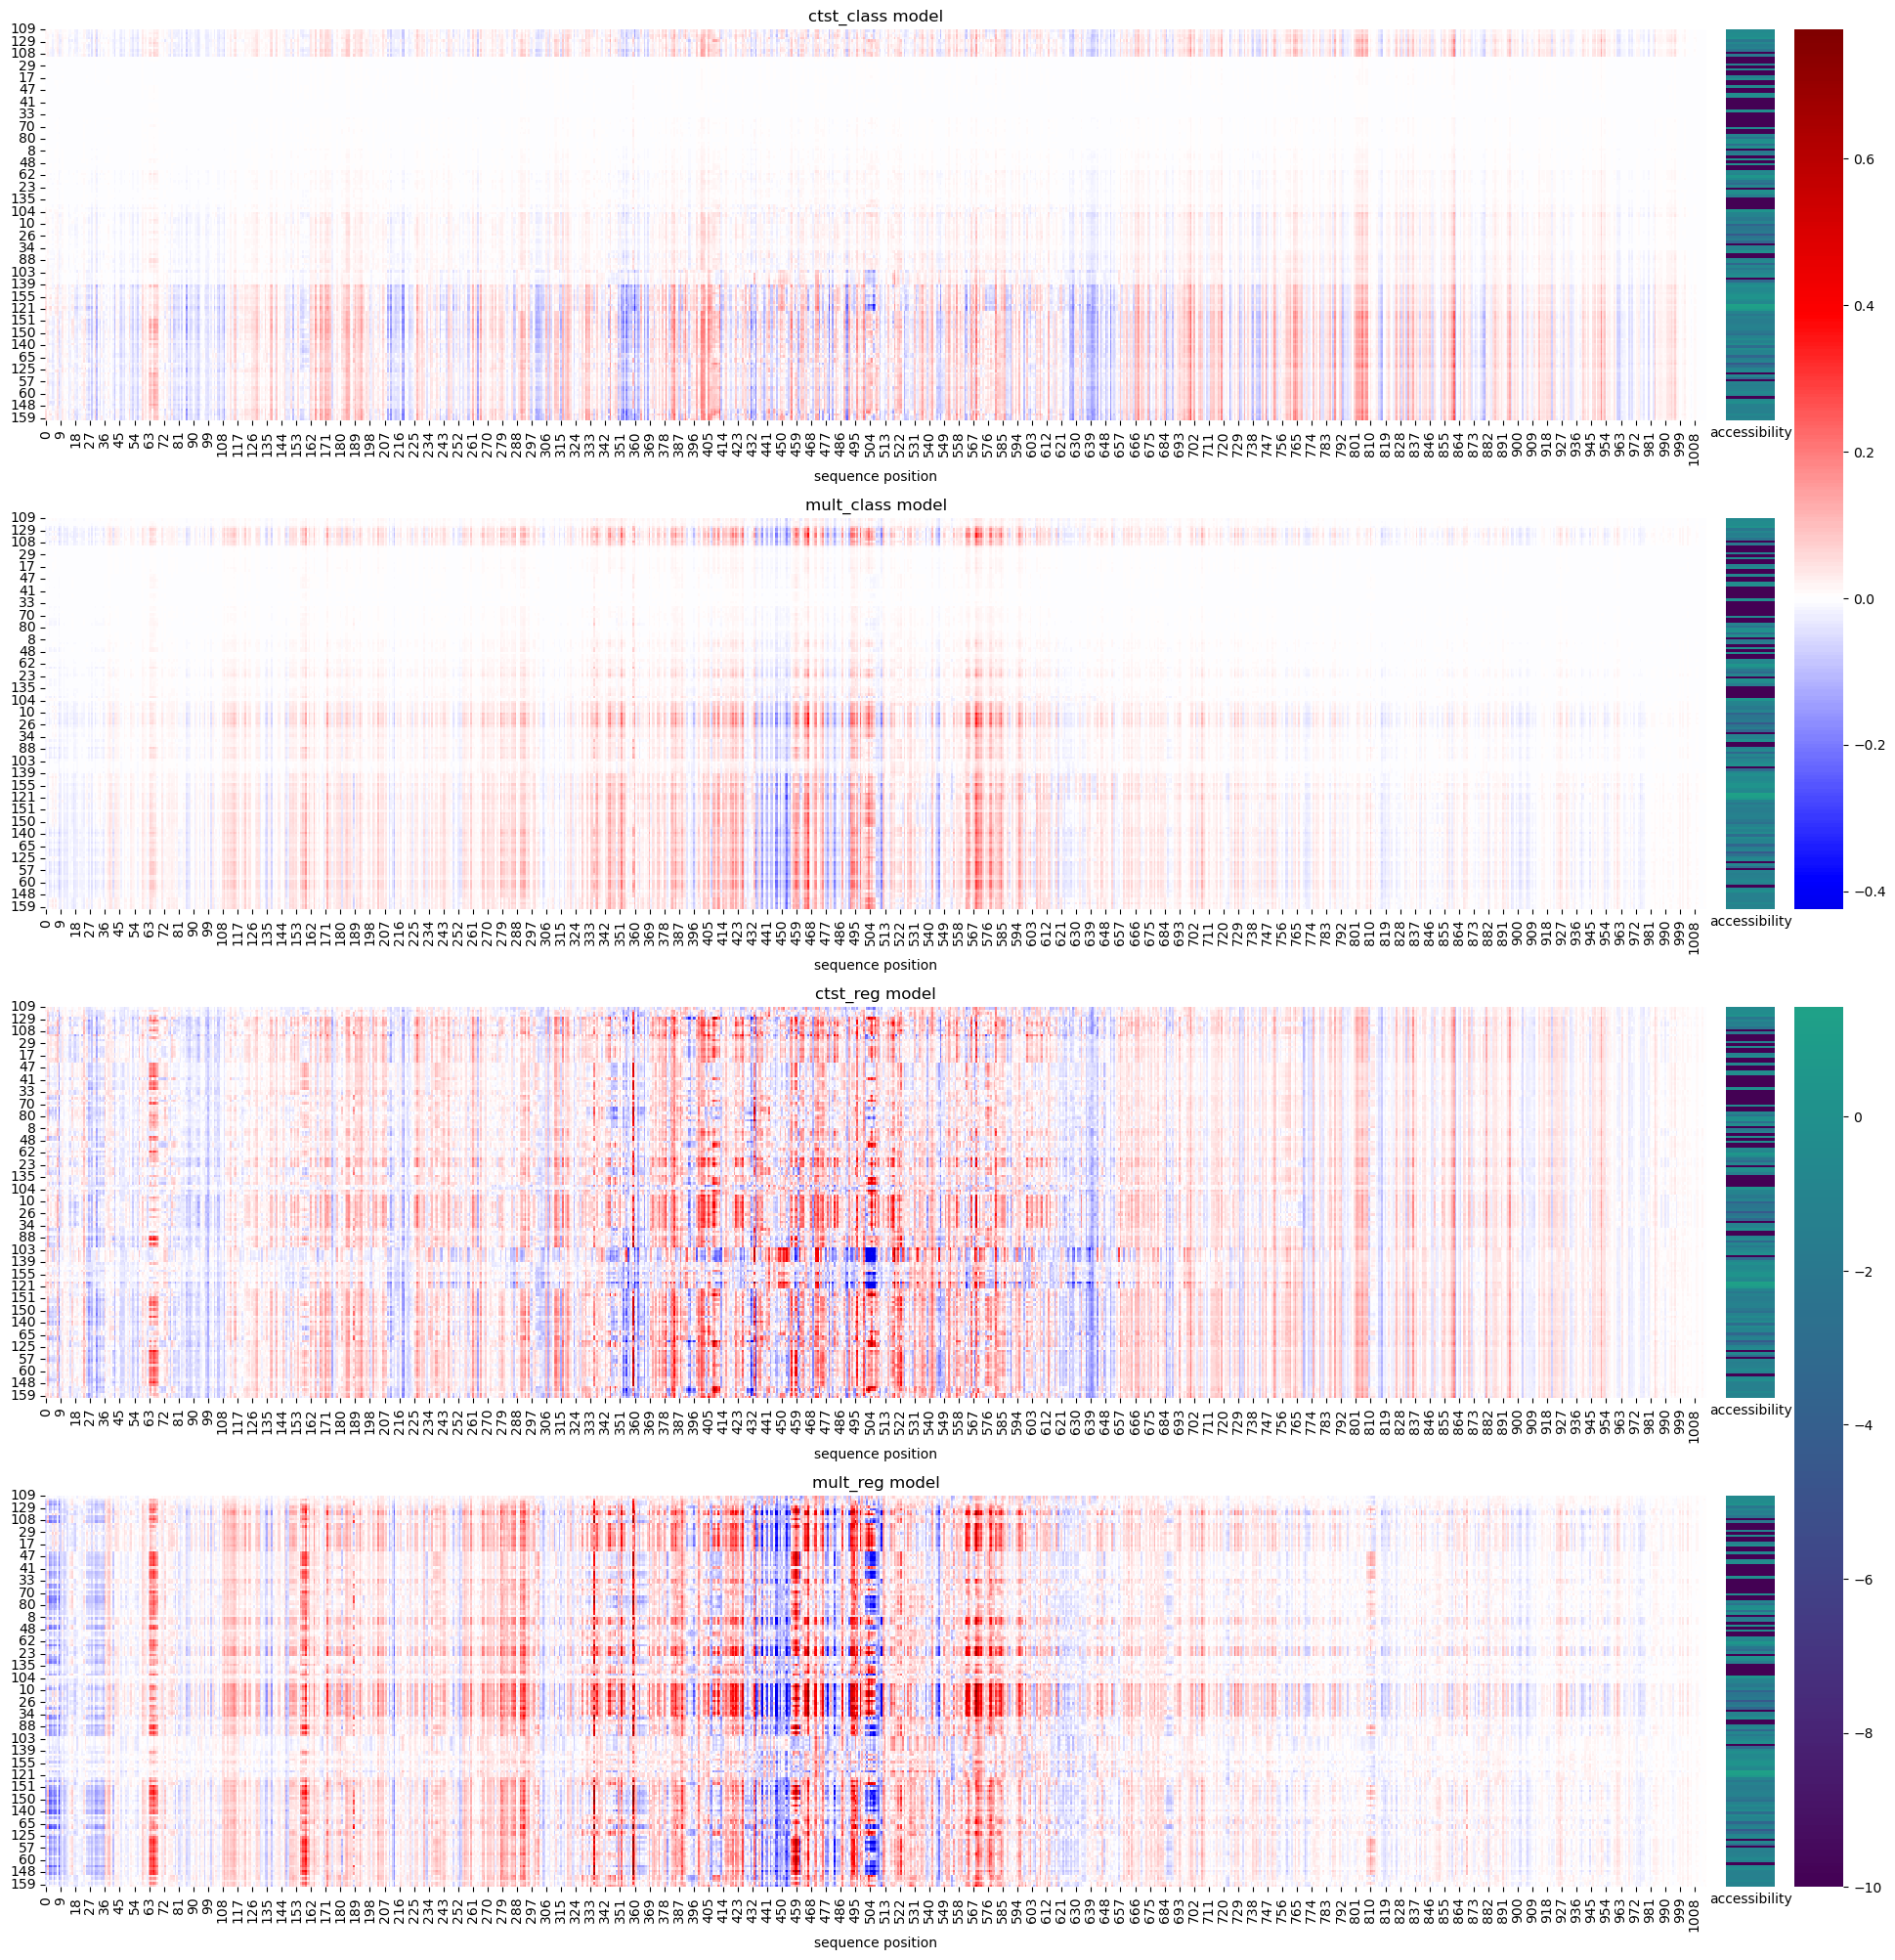

In [76]:
#and now let's look at the plot
results_list = [ctst_class, mult_class, ctst_reg, mult_reg]
utils_list = [ctst, mult, ctst, mult]
name_list = ['ctst_class', 'mult_class', 'ctst_reg', 'mult_reg']
multi_cluster(results_list, true_values, name_list, utils_list)

shape: (1, 9)
┌──────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬────────────────┐
│ motif_id     ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_sequen │
│ ---          ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ ce             │
│ str          ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---            │
│              ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str            │
╞══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪════════════════╡
│ Zfx_MA0146.2 ┆ train675868   ┆ 491   ┆ 504  ┆ … ┆ 10.1667 ┆ 0.0000874 ┆ 0.306   ┆ GGCTCAGGGGCCTG │
└──────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴─────────┴────────────────┘


(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'H9, true=0.6304451823234558'}>,
         <Axes: title={'center': 'H9, true=0.6304451823234558'}>],
        [<Axes: title={'center': 'dermis_microvascular_lymphatic_vessel_endothelial_cell_female, true=-0.5445914268493652'}>,
         <Axes: title={'center': 'dermis_microvascular_lymphatic_vessel_endothelial_cell_female, true=-0.5445914268493652'}>],
        [<Axes: title={'center': 'osteoblast, true=-10.0'}>,
         <Axes: title={'center': 'osteoblast, true=-10.0'}>],
        [<Axes: title={'center': 'GM19239, true=-0.2249571681022644'}>,
         <Axes: title={'center': 'GM19239, true=-0.2249571681022644'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

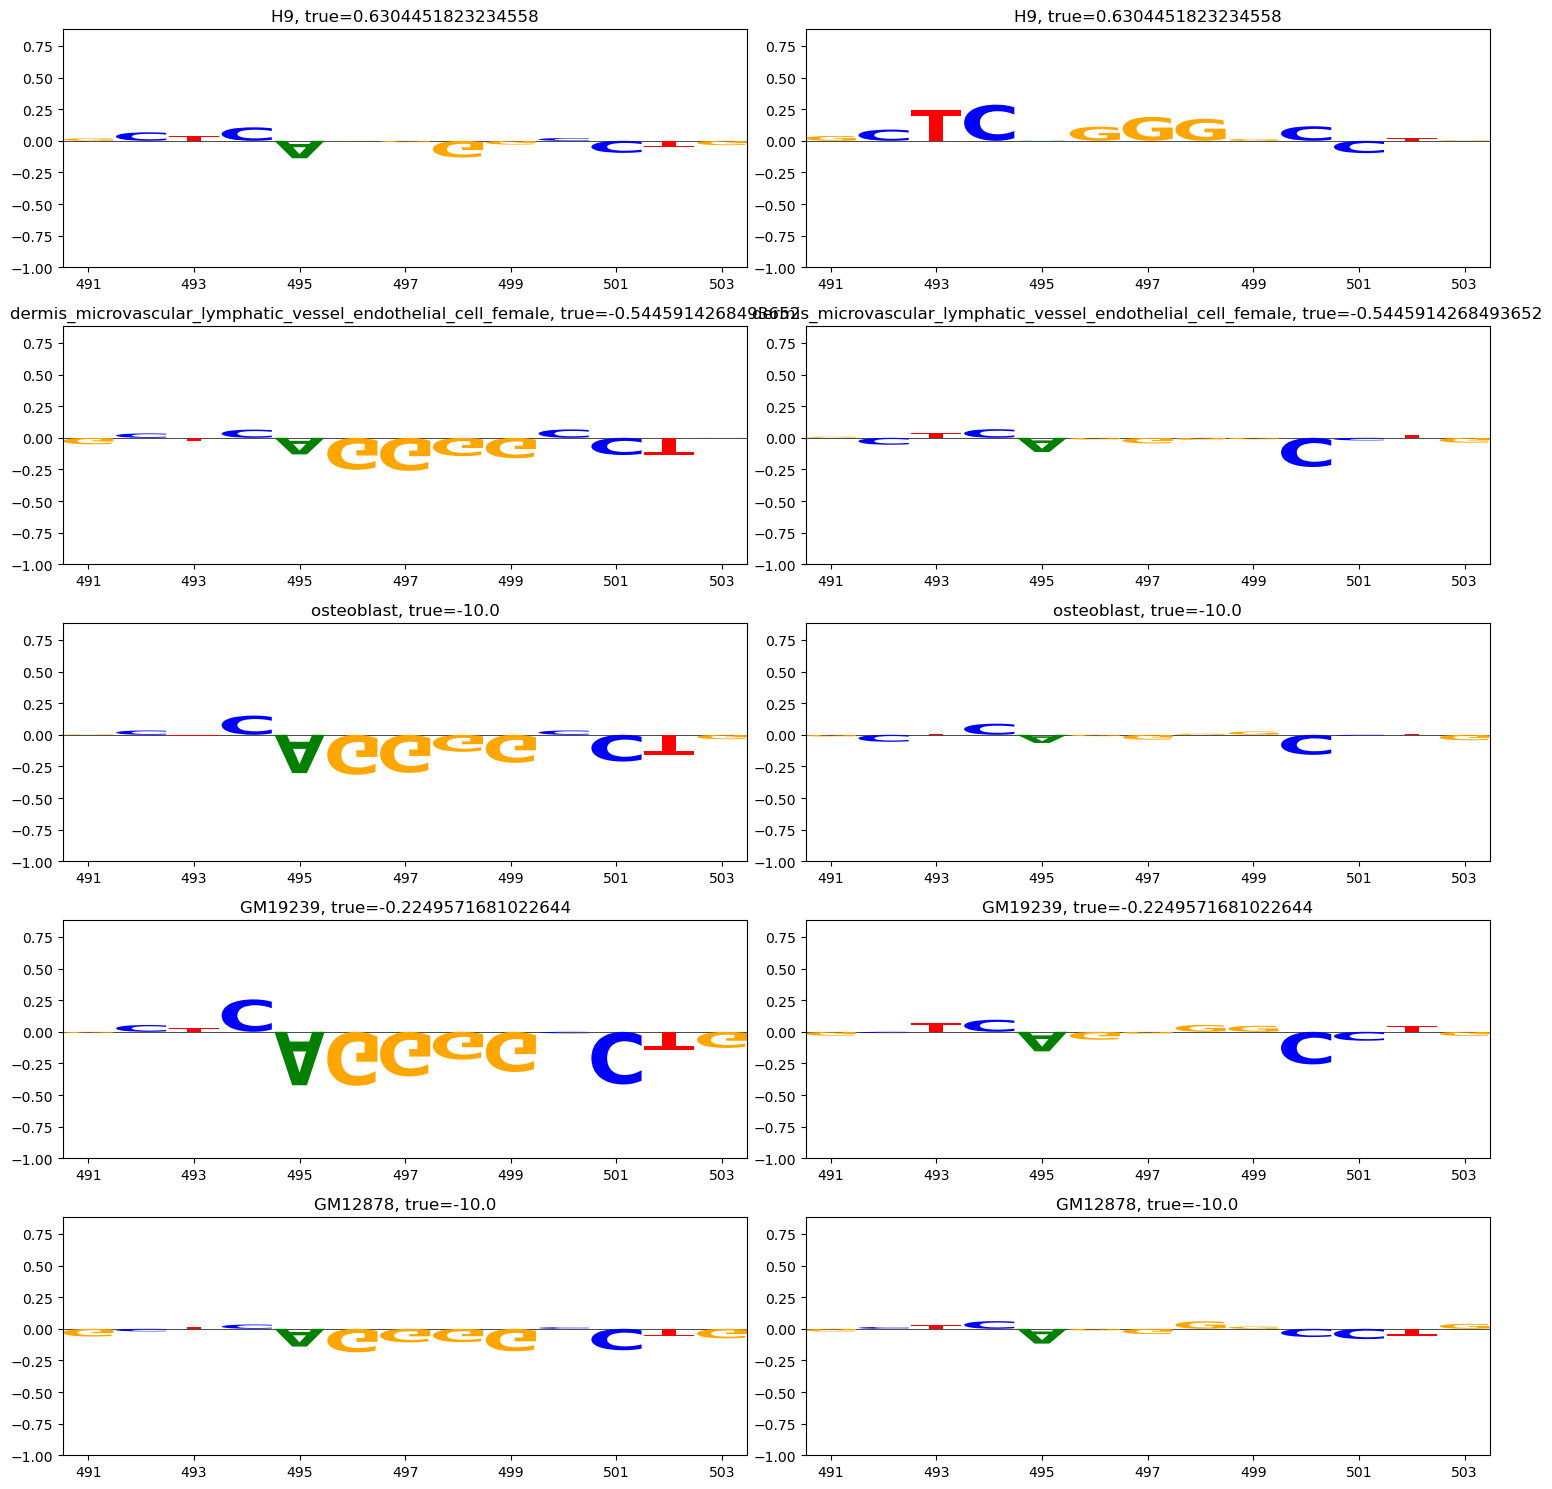

In [78]:
#let's look at 530 to 540 and then 540 to 550
print(filtered_df.filter(filtered_df['start'] == 491))
#and now the logo plot
cell_idxs = [121, 70, 33, 17, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(491,504), true_values = true_values)

shape: (1, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---           ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ nce           │
│ str           ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---           │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str           │
╞═══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪═══════════════╡
│ ZNF263_MA0528 ┆ train675868   ┆ 332   ┆ 352  ┆ … ┆ 10.0204 ┆ 0.0000556 ┆ 0.0273  ┆ GGATGAGCCAGAA │
│ .1            ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ GAAGGAAT      │
└───────────────┴───────────────┴───────┴──────┴───┴─────────┴───────────┴─────────┴───────────────┘


(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'H9, true=0.6304451823234558'}>,
         <Axes: title={'center': 'H9, true=0.6304451823234558'}>],
        [<Axes: title={'center': 'dermis_microvascular_lymphatic_vessel_endothelial_cell_female, true=-0.5445914268493652'}>,
         <Axes: title={'center': 'dermis_microvascular_lymphatic_vessel_endothelial_cell_female, true=-0.5445914268493652'}>],
        [<Axes: title={'center': 'osteoblast, true=-10.0'}>,
         <Axes: title={'center': 'osteoblast, true=-10.0'}>],
        [<Axes: title={'center': 'GM19239, true=-0.2249571681022644'}>,
         <Axes: title={'center': 'GM19239, true=-0.2249571681022644'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

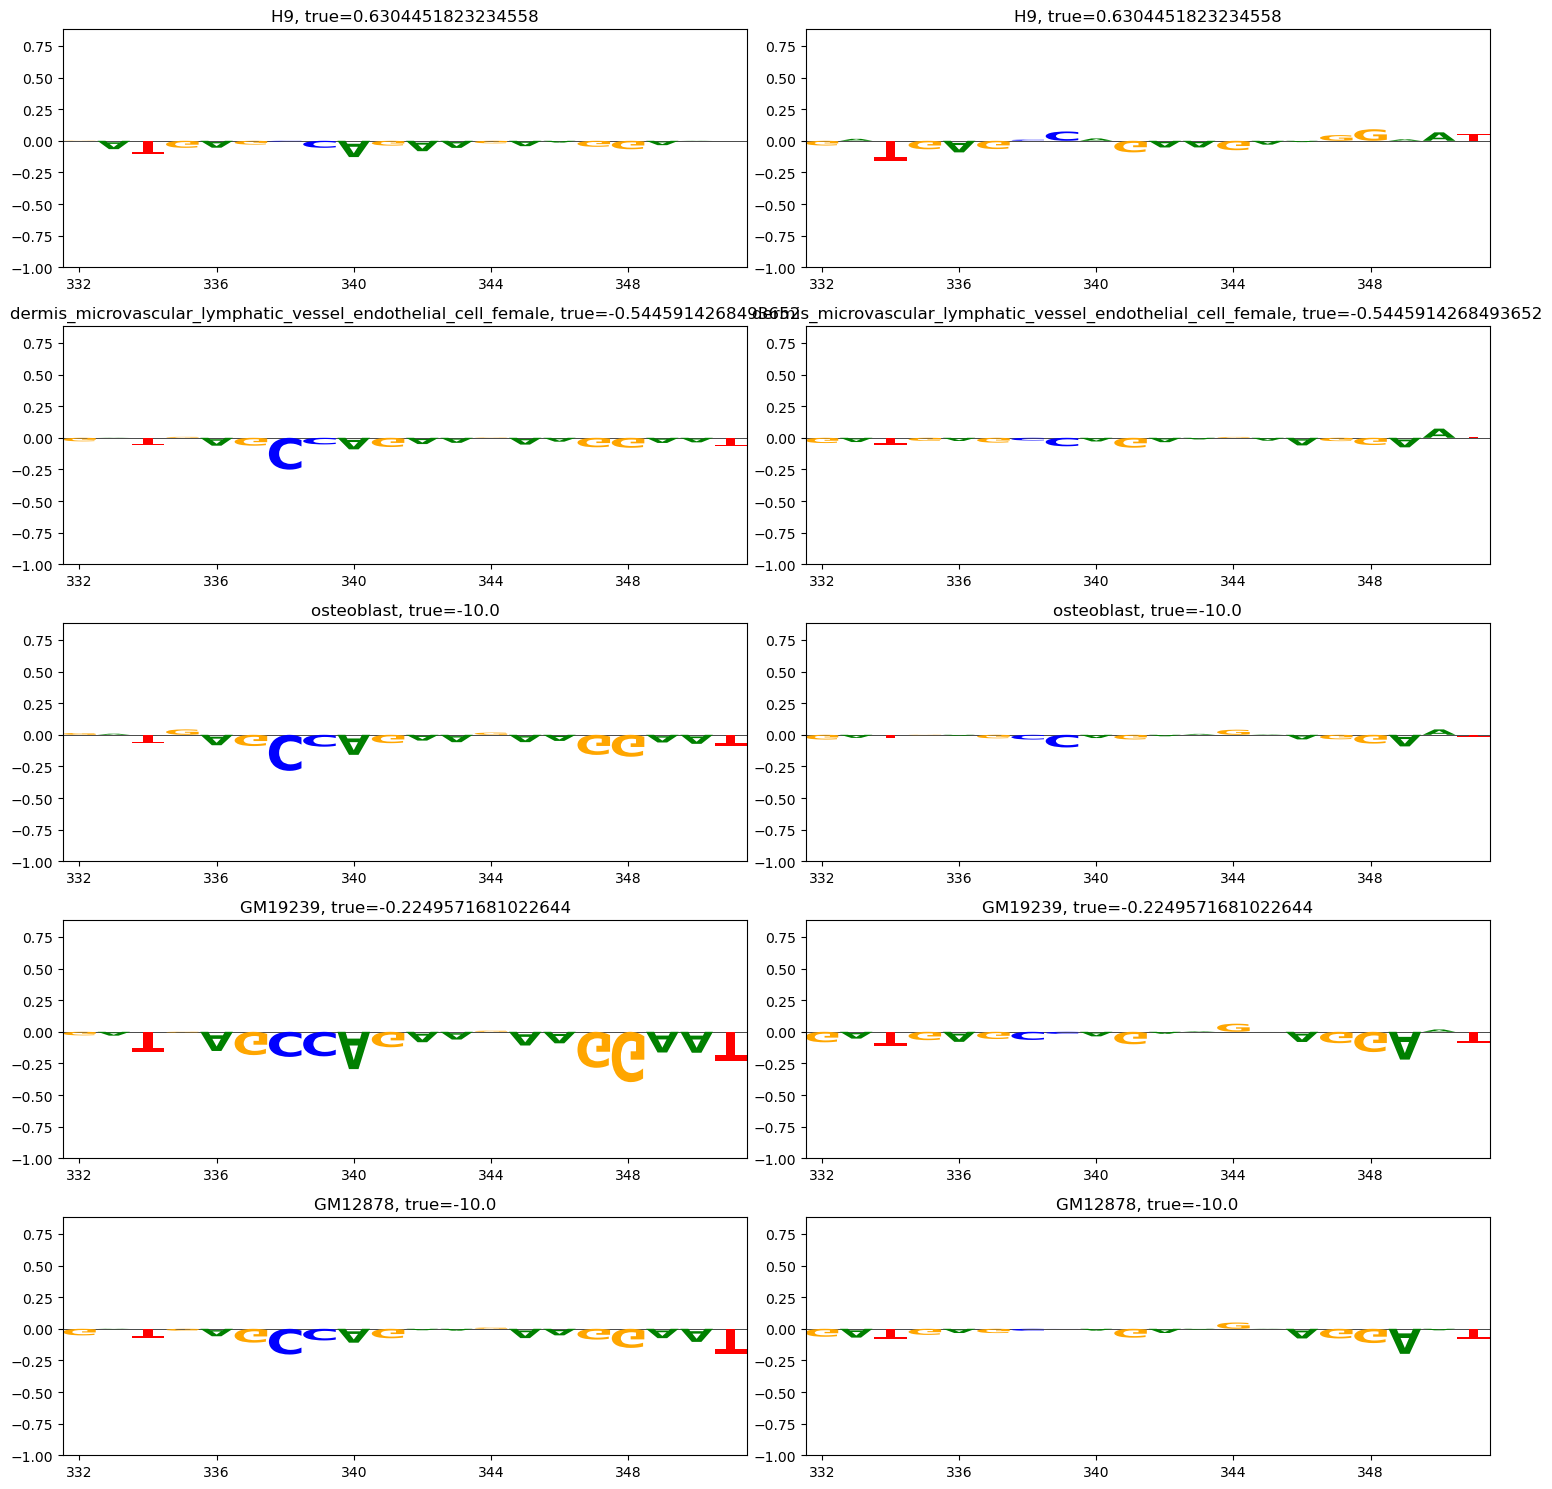

In [79]:
start = 332
end = 352
print(filtered_df.filter(filtered_df['start'] == start))
#and now the logo plot
cell_idxs = [121, 70, 33, 17, 54]
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(start,end), true_values = true_values)

shape: (3, 9)
┌───────────────┬───────────────┬───────┬──────┬───┬─────────┬───────────┬─────────┬───────────────┐
│ motif_id      ┆ sequence_name ┆ start ┆ stop ┆ … ┆ score   ┆ p-value   ┆ q-value ┆ matched_seque │
│ ---           ┆ ---           ┆ ---   ┆ ---  ┆   ┆ ---     ┆ ---       ┆ ---     ┆ nce           │
│ str           ┆ str           ┆ i64   ┆ i64  ┆   ┆ f64     ┆ f64       ┆ f64     ┆ ---           │
│               ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆ str           │
╞═══════════════╪═══════════════╪═══════╪══════╪═══╪═════════╪═══════════╪═════════╪═══════════════╡
│ TEAD2_MA1121. ┆ train675868   ┆ 503   ┆ 515  ┆ … ┆ 13.7636 ┆ 0.0000106 ┆ 0.353   ┆ TGACATTCCTGTC │
│ 1             ┆               ┆       ┆      ┆   ┆         ┆           ┆         ┆               │
│ TEAD4_MA0809. ┆ train675868   ┆ 504   ┆ 513  ┆ … ┆ 11.6774 ┆ 0.0000433 ┆ 0.502   ┆ GACATTCCTG    │
│ 1             ┆               ┆       ┆      ┆   ┆         ┆           ┆   

(<Figure size 1500x1500 with 10 Axes>,
 array([[<Axes: title={'center': 'H9, true=0.6304451823234558'}>,
         <Axes: title={'center': 'H9, true=0.6304451823234558'}>],
        [<Axes: title={'center': 'dermis_microvascular_lymphatic_vessel_endothelial_cell_female, true=-0.5445914268493652'}>,
         <Axes: title={'center': 'dermis_microvascular_lymphatic_vessel_endothelial_cell_female, true=-0.5445914268493652'}>],
        [<Axes: title={'center': 'osteoblast, true=-10.0'}>,
         <Axes: title={'center': 'osteoblast, true=-10.0'}>],
        [<Axes: title={'center': 'GM19239, true=-0.2249571681022644'}>,
         <Axes: title={'center': 'GM19239, true=-0.2249571681022644'}>],
        [<Axes: title={'center': 'GM12878, true=-10.0'}>,
         <Axes: title={'center': 'GM12878, true=-10.0'}>]], dtype=object))

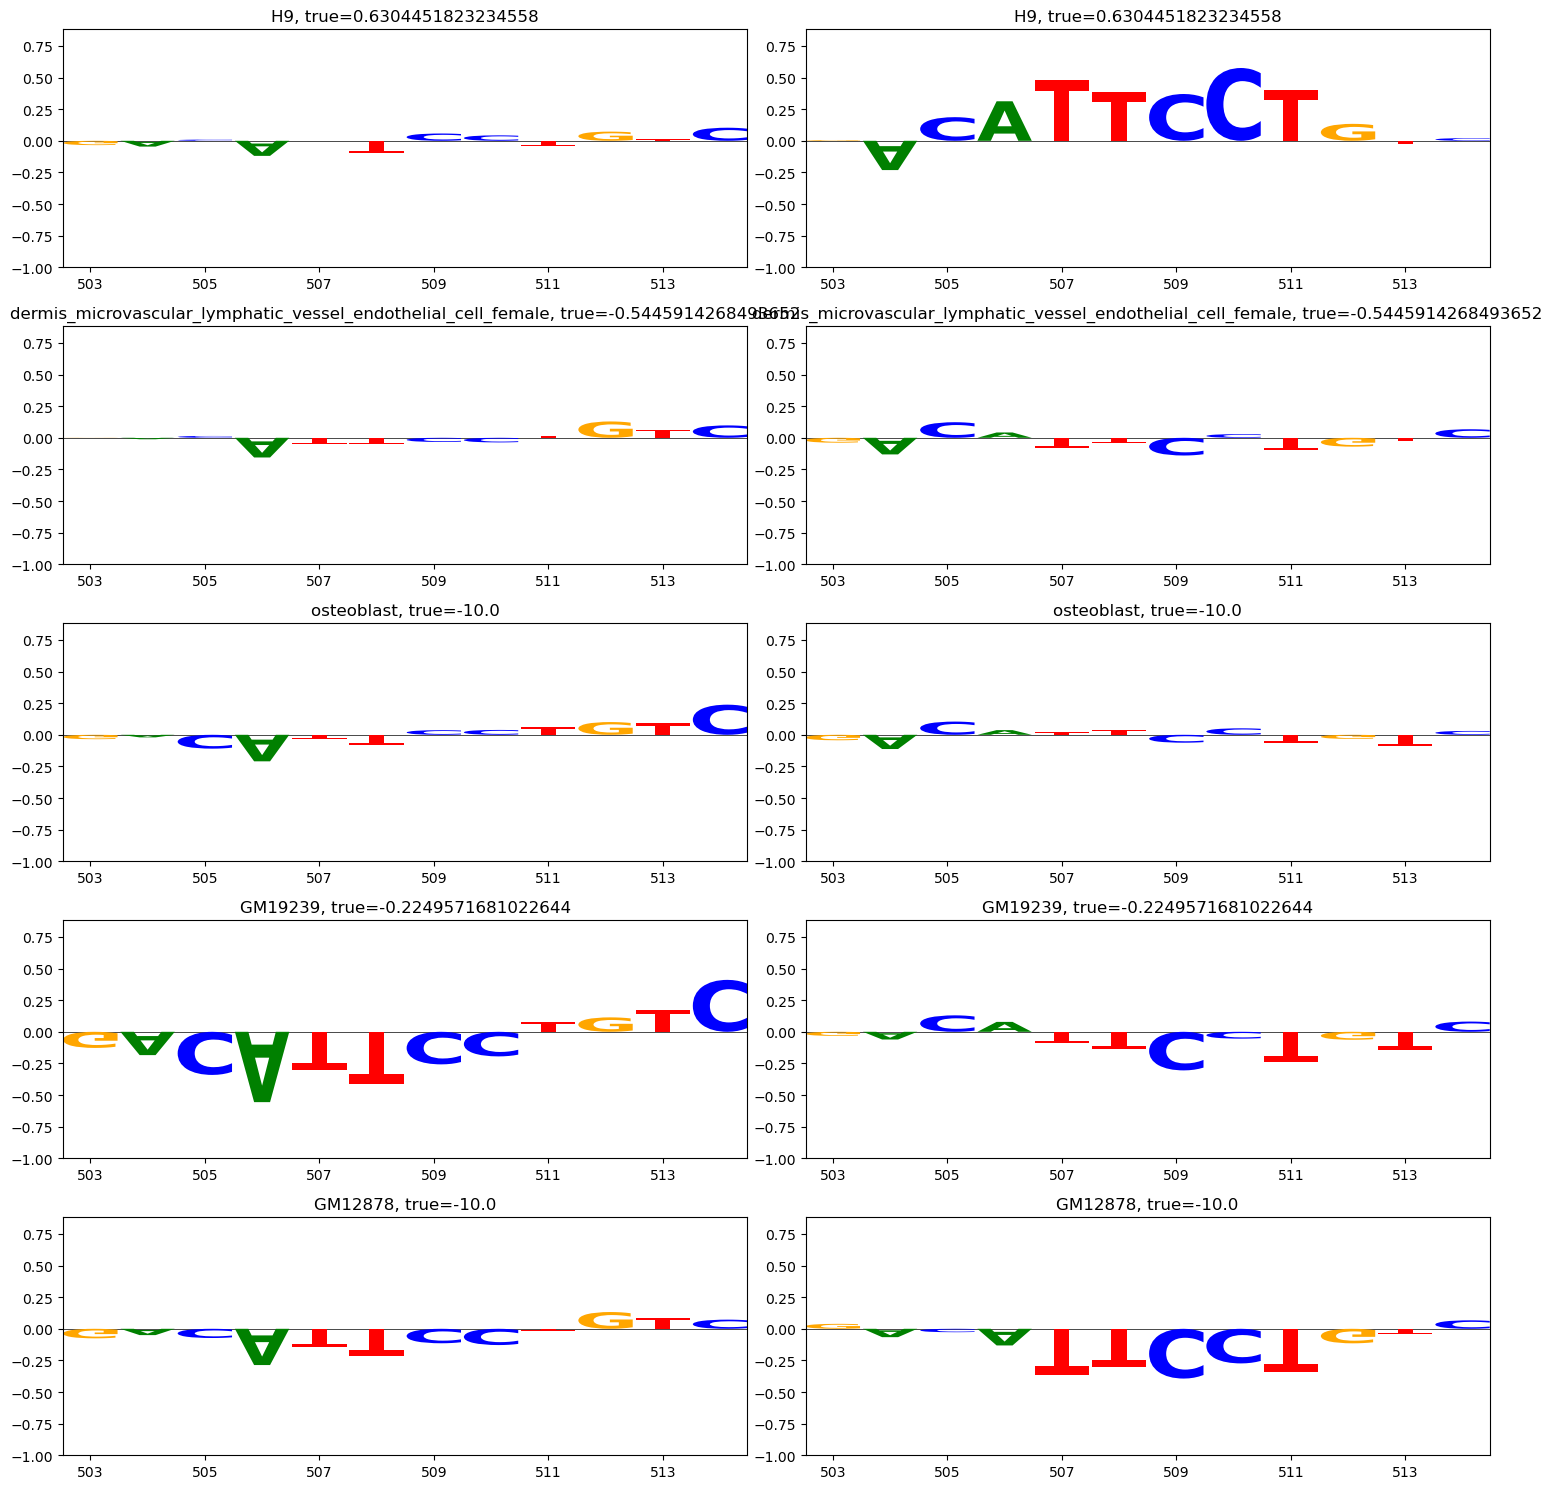

In [81]:
start = 503
end = 515
print(filtered_df.filter(filtered_df['start'].is_in([503,504,505,506])))
#and now the logo plot
celltype_compare_logo([mult,ctst],idx, cell_idxs, [mult_reg.sum(0), ctst_reg.sum(0)], startend=(start,end), true_values = true_values)